# **Digital Entertainment Market Analysis**

<div style="background-color: beige; text-align: center; font-weight: bold; padding: 10px; font-size: 24px;">
    Project Overview & Structure
</div>

## Project Overview

The video game industry has grown into a massive global enterprise, generating an estimated 455 billion in revenue in 2024.  
Notably, the mobile gaming market alone accounted for $98.7 billion of this total.  

This self-led analysis leverages historical trends to uncover insights into the industry’s pivotal role, not just as an economic powerhouse but as a medium for **community building, personal development, and stress relief**.  
By understanding past trends, we can explore ways to enhance gaming's ability to fulfill these roles in the future.

This project was conducted using a **real dataset sourced from Kaggle** available here: [https://www.kaggle.com/datasets/rishidamarla/video-game-sales](https://www.kaggle.com/datasets/rishidamarla/video-game-sales)

It incorporates advanced analysis and visualization techniques using the following Python libraries:

* **Pandas**
* **NumPy**
* **Matplotlib**
* **Seaborn**

## Analysis Structure

The analysis is divided into the following key sections:

1. **Data Exploration**: Understanding the dataset’s structure and content.
2. **Data Cleaning/Wrangling**: Preparing the data for analysis by addressing inconsistencies.
3. **Data Analysis**: Examining trends, correlations, and patterns.
4. **Market Insights**: Uncovering actionable insights for future industry success.

As a fellow gamer, I hope this analysis is both clear and informative.


<div style="background-color: beige; text-align: center; font-weight: bold; padding: 10px; font-size: 24px;">
    Importing Packages and Reading the Dataframe
</div>

In [695]:
# import our packages first
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting seaborn parameters 
sns.set_style('darkgrid')
plt.rcParams['font.size']=13
plt.rcParams['figure.figsize']=(36,20)
plt.rcParams['figure.facecolor']='white'

* If not already avaiable, you can use the command !pip3 install (insert package name here) to install the packages before importing them
     e.g., !pip3 install seaborn

In [475]:
# READING THE FILE
df = pd.read_csv(r"/Users/ruthbeaubrun/Downloads/Video_Games.csv")

<div style="background-color: beige; text-align: center; font-weight: bold; padding: 10px; font-size: 24px;">
    Data Exploration
</div>

In [477]:
# understanding the number of rows and columns in the dataset
df.shape

(16719, 16)

In [479]:
# next i want to see what those columns are and their data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


* There are 16K rows and 16 columns describing game sales, users, developpers, platforms and critic count/rating

In [481]:
# understanding the values in each column 
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [489]:
# total sales considered in this dataset
df['Global_Sales'].sum()

8920.300000000001

# This data includes 
* games released from 1980 - 2020
* 8.9B in Global Sales
* sales data in North America, Europe, Japan, and 'Other' regions 
* critic scores range from 13 to 98
* on average there's about 26 critics per game
* data from 10B users

In [492]:
# checking for unique values across all columns 

df.nunique()

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count           888
Developer           1696
Rating                 8
dtype: int64

# More on the dataset
* 39 years of data across, 31 platforms, 12 genres, 581 publishers, and 1.7K developpers - we will learn more about them through the analysis
* there are 8 different types of ratings each game can get
* the gaming industry is diverse and broad in type - on potential recommendation could be for investors to invest in platforms with broad reach and diverse gaming portoflios

In [494]:
# sorting the data frame by games with highest sales 

df.sort_values(by = 'Global_Sales', ascending = True).head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16296,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,NaN,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16295,Casper,GBA,2002.0,Adventure,Microids,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16294,Simple 2000 Series Vol. 120: The Saigo no Nipp...,PS2,2007.0,Strategy,D3Publisher,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16293,Rave Master: Special Attack Force!,GBA,2002.0,Fighting,Konami Digital Entertainment,0.01,0.00,0.00,0.0,0.01,56.0,9.0,tbd,NaN,KCEJ,T
16292,K-1 Grand Prix,PS,1999.0,Fighting,Jaleco,0.01,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16291,Shorts,DS,NaN,Platform,Unknown,0.01,0.00,0.00,0.0,0.01,NaN,NaN,tbd,NaN,Artificial Mind and Movement,E10+
16290,Metal Slug Anthology,PS2,2007.0,Shooter,Ignition Entertainment,0.00,0.00,0.01,0.0,0.01,80.0,20.0,8.1,16.0,Terminal Reality,T
16297,Adventure Time: The Secret of the Nameless,X360,2014.0,Adventure,Little Orbit,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16289,Truck Racer,Wii,2009.0,Racing,Nordic Games,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


# Data Exploration Insights
* Play Station, Gameboy, and Xbox have had fairly successful games across various years
* This dataset also include games launched on Wii, DS, and PC
* Games with highest sales vary in genre - Adventure and Fighting seem to be popular amongst top 20 games by sales
* Many of the games in this data frame were released after 2000, 2007-2012 are most common throughout

<div style="background-color: beige; text-align: center; font-weight: bold; padding: 10px; font-size: 24px;">
    Data Cleaning
</div>

In [497]:
# lets count nulls!
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

* There are nulls in Year of Release, Name, and Publisher. Removing them would give us a complete look of the data

In [499]:
#remove null value in Year of release column
df.drop(df[df.Year_of_Release.isnull()].index, inplace = True) 

#remove null value in Name column
df.drop(df[df.Name.isnull()].index, inplace = True) 

#remove null value in Publisher column
df.drop(df[df.Publisher.isnull()].index, inplace = True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16416 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
 10  Critic_Score     7982 non-null   float64
 11  Critic_Count     7982 non-null   float64
 12  User_Score       9837 non-null   object 
 13  User_Count       7461 non-null   float64
 14  Developer        9904 non-null   object 
 15  Rating           9767 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.1+ MB


From the cleaned results we see:
* There are 16k rows of gaming data
* Many of the games do not have critic, user, or rating data
* Each row is assigned sales and source data (Platform, Developer, Genre)

In [501]:
# let's see a unique list of the 39 platforms out of curiosity 

unique_platforms = df['Platform'].unique()
print(unique_platforms)

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


It may be helpful to add a column with unabbreviated platform names for easy readbability 

In [503]:
# first create a dictionary assigning the legacy platform abbreviations to full names
platform_mapping = {
    'Wii': 'Nintendo Wii',
    'NES': 'Nintendo Entertainment System',
    'GB': 'Game Boy',
    'DS': 'Nintendo DS',
    'X360': 'Xbox 360',
    'PS3': 'PlayStation 3',
    'PS2': 'PlayStation 2',
    'SNES': 'Super Nintendo Entertainment System',
    'GBA': 'Game Boy Advance',
    'PS4': 'PlayStation 4',
    '3DS': 'Nintendo 3DS',
    'N64': 'Nintendo 64',
    'PS': 'PlayStation',
    'XB': 'Xbox',
    'PC': 'Personal Computer',
    '2600': 'Atari 2600',
    'PSP': 'PlayStation Portable',
    'XOne': 'Xbox One',
    'WiiU': 'Nintendo Wii U',
    'GC': 'Nintendo GameCube',
    'GEN': 'Sega Genesis',
    'DC': 'Sega Dreamcast',
    'PSV': 'PlayStation Vita',
    'SAT': 'Sega Saturn',
    'SCD': 'Sega CD',
    'WS': 'WonderSwan',
    'NG': 'Neo Geo',
    'TG16': 'TurboGrafx-16',
    '3DO': '3DO Interactive Multiplayer',
    'GG': 'Sega Game Gear',
    'PCFX': 'PC-FX'
}

# next use the .map() function to create a new column in df mapping the old names to new ones
df['Platforms_Clean'] = df['Platform'].map(platform_mapping)

# the result
df


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Platforms_Clean
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,Nintendo Wii
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,Nintendo Entertainment System
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,Nintendo Wii
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,Nintendo Wii
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,Game Boy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,PlayStation 3
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Xbox 360
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,PlayStation Vita
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Game Boy Advance


In [505]:
# moving platforms_clean closer to the platform column

column_to_move = df.pop('Platforms_Clean')
df.insert(2, 'Platforms_Clean', column_to_move)

df

,Name,Platform,Platforms_Clean,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,Nintendo Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,Nintendo Entertainment System,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,Nintendo Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,Nintendo Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,Game Boy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,PlayStation 3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,Xbox 360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,PlayStation Vita,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,Game Boy Advance,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [509]:
# it would be helpful to move all game baseline data including developer and rating ahead too

column_to_move2 = df.pop('Developer')
df.insert(3, 'Developer', column_to_move2)

column_to_move3 = df.pop('Rating')
df.insert(4, 'Rating', column_to_move3)

df

,Name,Platform,Platforms_Clean,Developer,Rating,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,Nintendo Wii,Nintendo,E,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0
1,Super Mario Bros.,NES,Nintendo Entertainment System,NaN,NaN,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,Nintendo Wii,Nintendo,E,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
3,Wii Sports Resort,Wii,Nintendo Wii,Nintendo,E,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0
4,Pokemon Red/Pokemon Blue,GB,Game Boy,NaN,NaN,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,PlayStation 3,NaN,NaN,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,Xbox 360,NaN,NaN,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,PlayStation Vita,NaN,NaN,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,Game Boy Advance,NaN,NaN,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN


In [511]:
# i am seeing the year of release has a .0 after it - it should be an integer not a float - let's clean that 

df['Year_of_Release'] = df['Year_of_Release'].astype('Int64')
df

,Name,Platform,Platforms_Clean,Developer,Rating,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,Nintendo Wii,Nintendo,E,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0
1,Super Mario Bros.,NES,Nintendo Entertainment System,NaN,NaN,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,Nintendo Wii,Nintendo,E,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
3,Wii Sports Resort,Wii,Nintendo Wii,Nintendo,E,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0
4,Pokemon Red/Pokemon Blue,GB,Game Boy,NaN,NaN,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,PlayStation 3,NaN,NaN,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,Xbox 360,NaN,NaN,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,PlayStation Vita,NaN,NaN,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,Game Boy Advance,NaN,NaN,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN


In [513]:
# formatting user counts in millions 

df['User_Count'] = df['User_Count'].map("{:.2f}".format)
df

,Name,Platform,Platforms_Clean,Developer,Rating,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,Nintendo Wii,Nintendo,E,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.00
1,Super Mario Bros.,NES,Nintendo Entertainment System,NaN,NaN,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,nan
2,Mario Kart Wii,Wii,Nintendo Wii,Nintendo,E,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.00
3,Wii Sports Resort,Wii,Nintendo Wii,Nintendo,E,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.00
4,Pokemon Red/Pokemon Blue,GB,Game Boy,NaN,NaN,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,PlayStation 3,NaN,NaN,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,nan
16715,LMA Manager 2007,X360,Xbox 360,NaN,NaN,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,nan
16716,Haitaka no Psychedelica,PSV,PlayStation Vita,NaN,NaN,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,nan
16717,Spirits & Spells,GBA,Game Boy Advance,NaN,NaN,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,nan


In [46]:
# Rating values 

df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

* These ratings are difficult to understand without context and would be helpful to map them as well later on

<div style="background-color: beige; text-align: center; font-weight: bold; padding: 10px; font-size: 24px;">
    Data Analysis and Visualization
</div>

In [515]:
# returning table after data cleaning

df

,Name,Platform,Platforms_Clean,Developer,Rating,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,Nintendo Wii,Nintendo,E,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.00
1,Super Mario Bros.,NES,Nintendo Entertainment System,NaN,NaN,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,nan
2,Mario Kart Wii,Wii,Nintendo Wii,Nintendo,E,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.00
3,Wii Sports Resort,Wii,Nintendo Wii,Nintendo,E,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.00
4,Pokemon Red/Pokemon Blue,GB,Game Boy,NaN,NaN,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,PlayStation 3,NaN,NaN,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,nan
16715,LMA Manager 2007,X360,Xbox 360,NaN,NaN,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,nan
16716,Haitaka no Psychedelica,PSV,PlayStation Vita,NaN,NaN,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,nan
16717,Spirits & Spells,GBA,Game Boy Advance,NaN,NaN,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,nan


In [700]:
# total Global sales in this dataset
df['Global_Sales'].sum()

8810.6

# Global Sales Over Time (1980 - 2020)

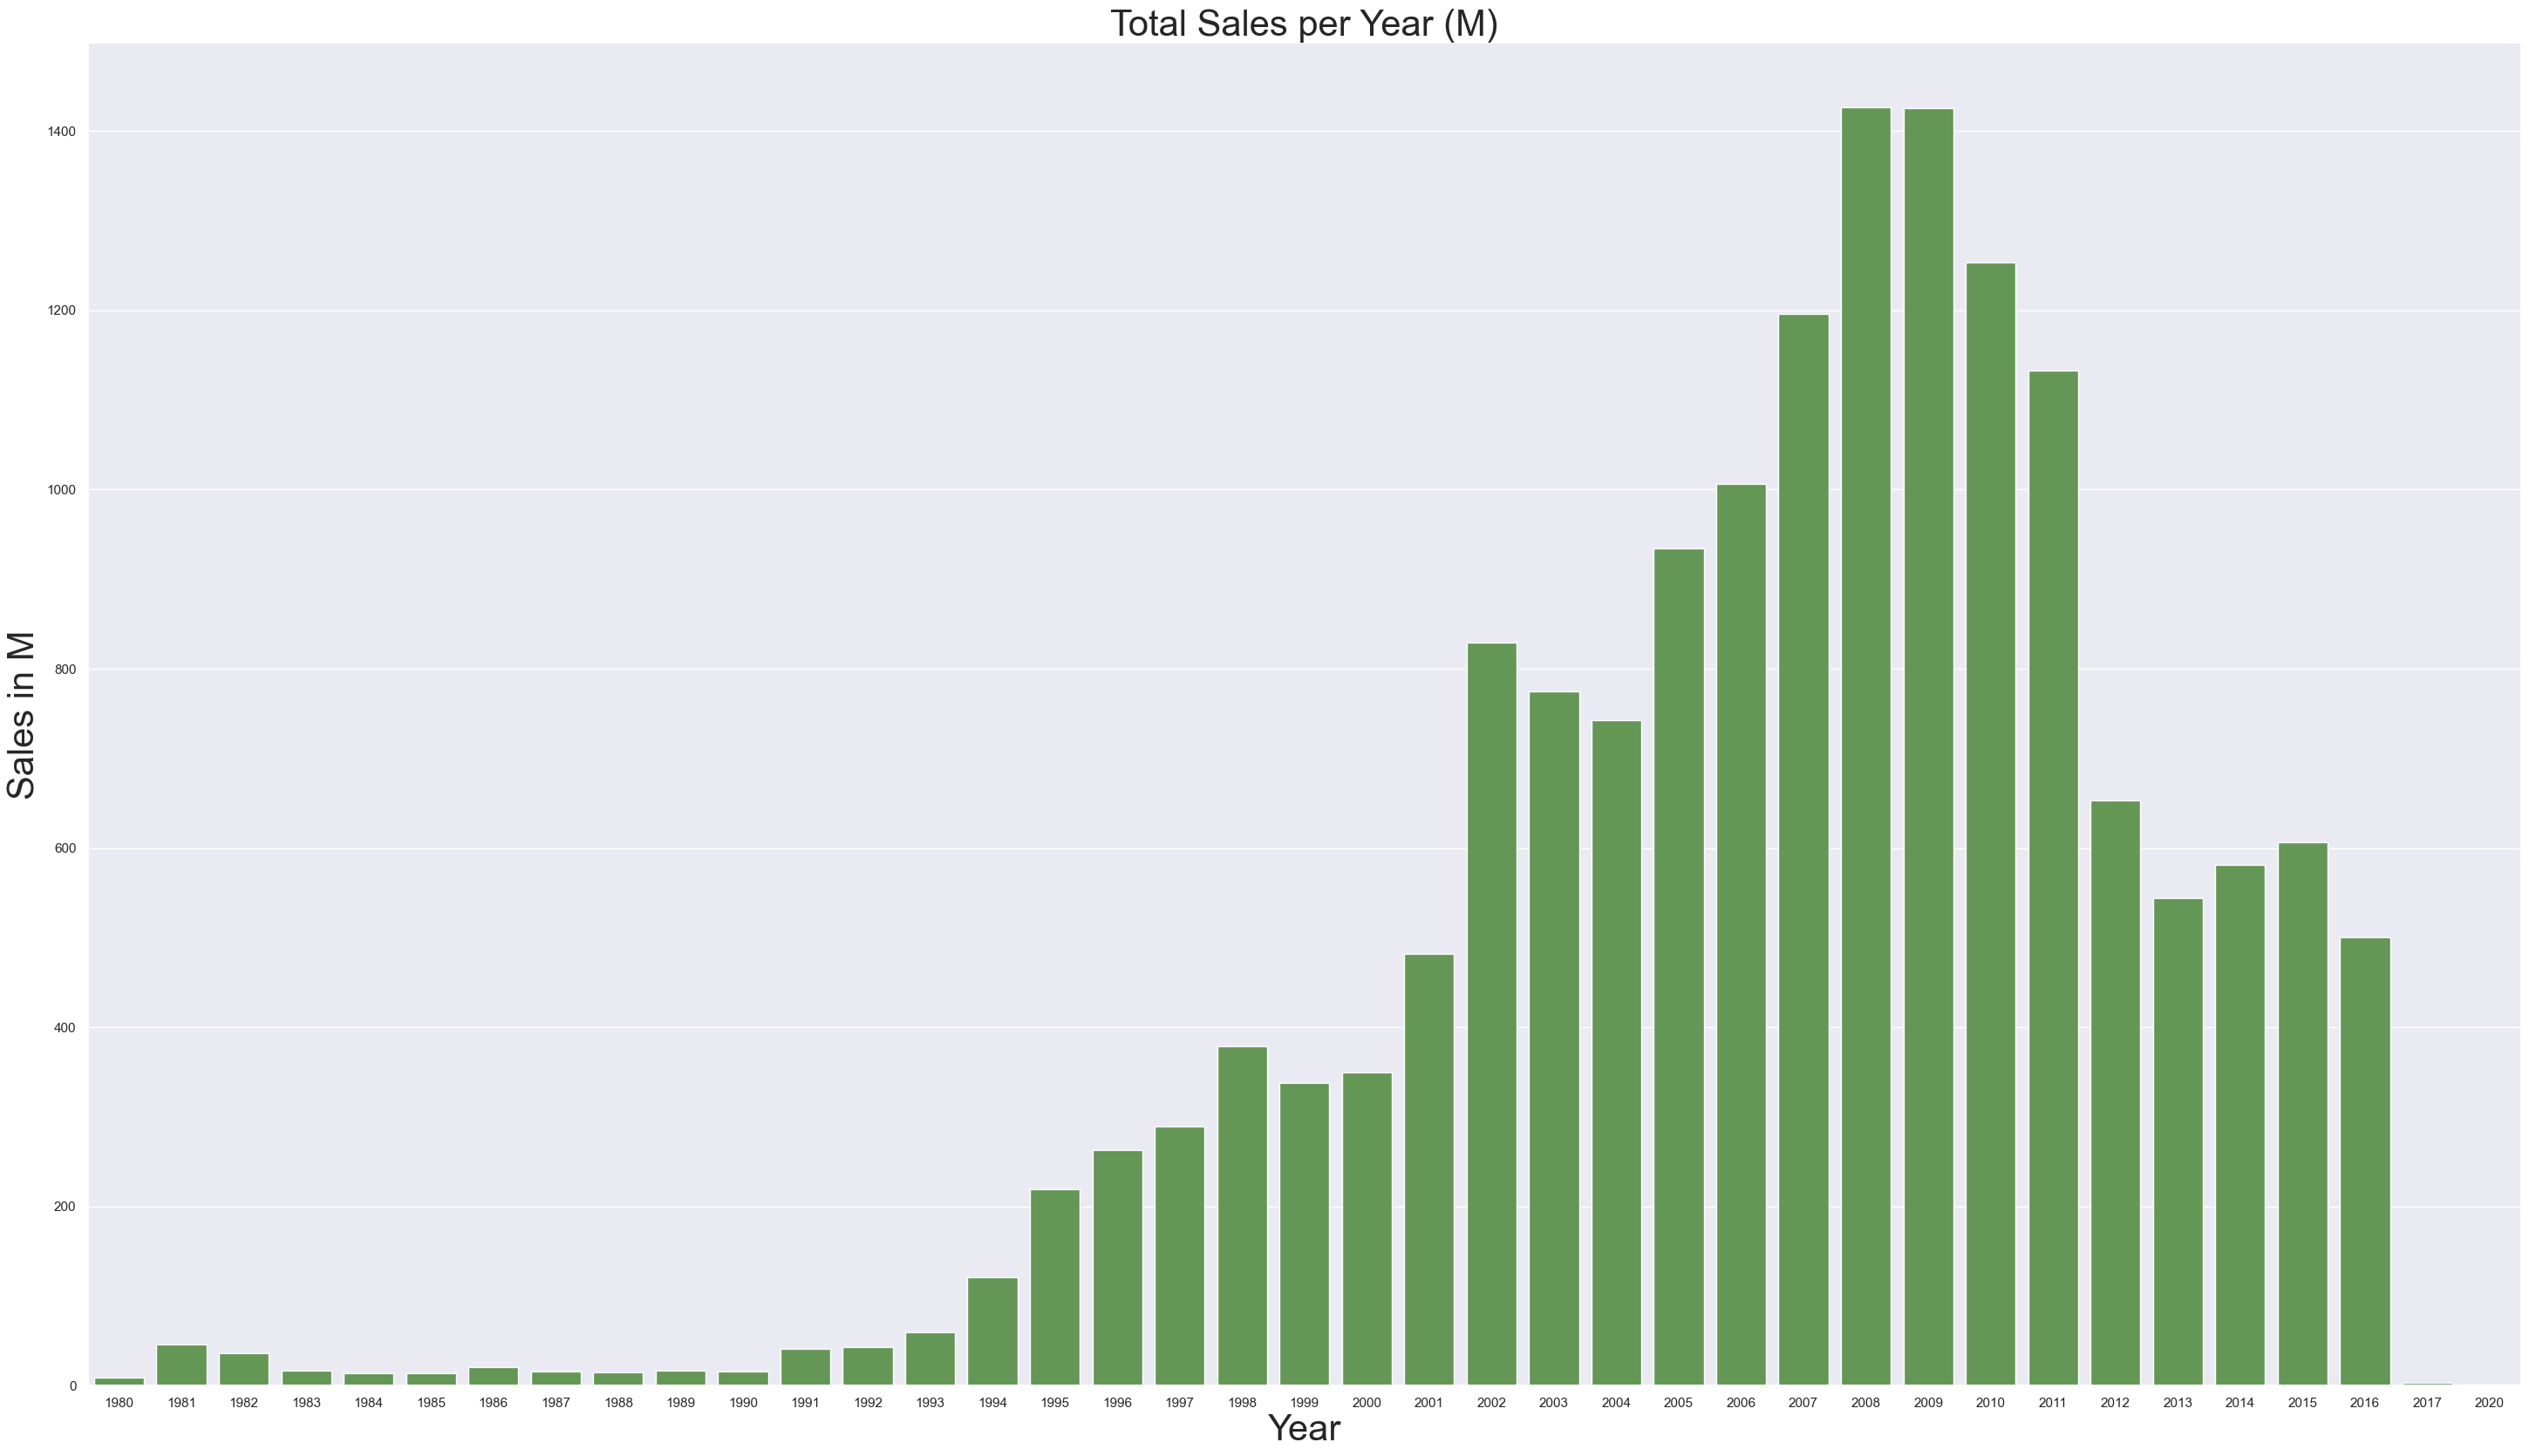

In [517]:
# using sns.countplot to show total game sales across all regions for each year 

# define Seaborn color palette to use
palette_color = sns.color_palette('gist_earth', n_colors = 1)[0]

#plot values and formatting
sns.countplot(x = df['Year_of_Release'], color = palette_color, legend = False)
plt.title('Total Sales per Year (M)', fontsize = 30)
plt.xlabel('Year', fontsize = 30)
plt.ylabel('Sales in M', fontsize = 30)
plt.show()

# Initial Insights from Exploratory Analysis

* Total market size in this data set is 8.8B in sales
* Prior to 2000, there weren't many games released - probably due to a lack of electronic evolution before that time. 
* We see a spike between 2005 and 2007 and afterward a rapid decline. 
* Focusing on this 'gaming boom' after 2000 could provide insights into the market at its healthiest

In [519]:
# filtering out all games out of the table released before 2000

df2 = df[df['Year_of_Release'] > 2000] # using df2 for filtered analysis 

df2

,Name,Platform,Platforms_Clean,Developer,Rating,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,Nintendo Wii,Nintendo,E,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.00
2,Mario Kart Wii,Wii,Nintendo Wii,Nintendo,E,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.00
3,Wii Sports Resort,Wii,Nintendo Wii,Nintendo,E,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.00
6,New Super Mario Bros.,DS,Nintendo DS,Nintendo,E,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.00
7,Wii Play,Wii,Nintendo Wii,Nintendo,E,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,PlayStation 3,NaN,NaN,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,nan
16715,LMA Manager 2007,X360,Xbox 360,NaN,NaN,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,nan
16716,Haitaka no Psychedelica,PSV,PlayStation Vita,NaN,NaN,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,nan
16717,Spirits & Spells,GBA,Game Boy Advance,NaN,NaN,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,nan


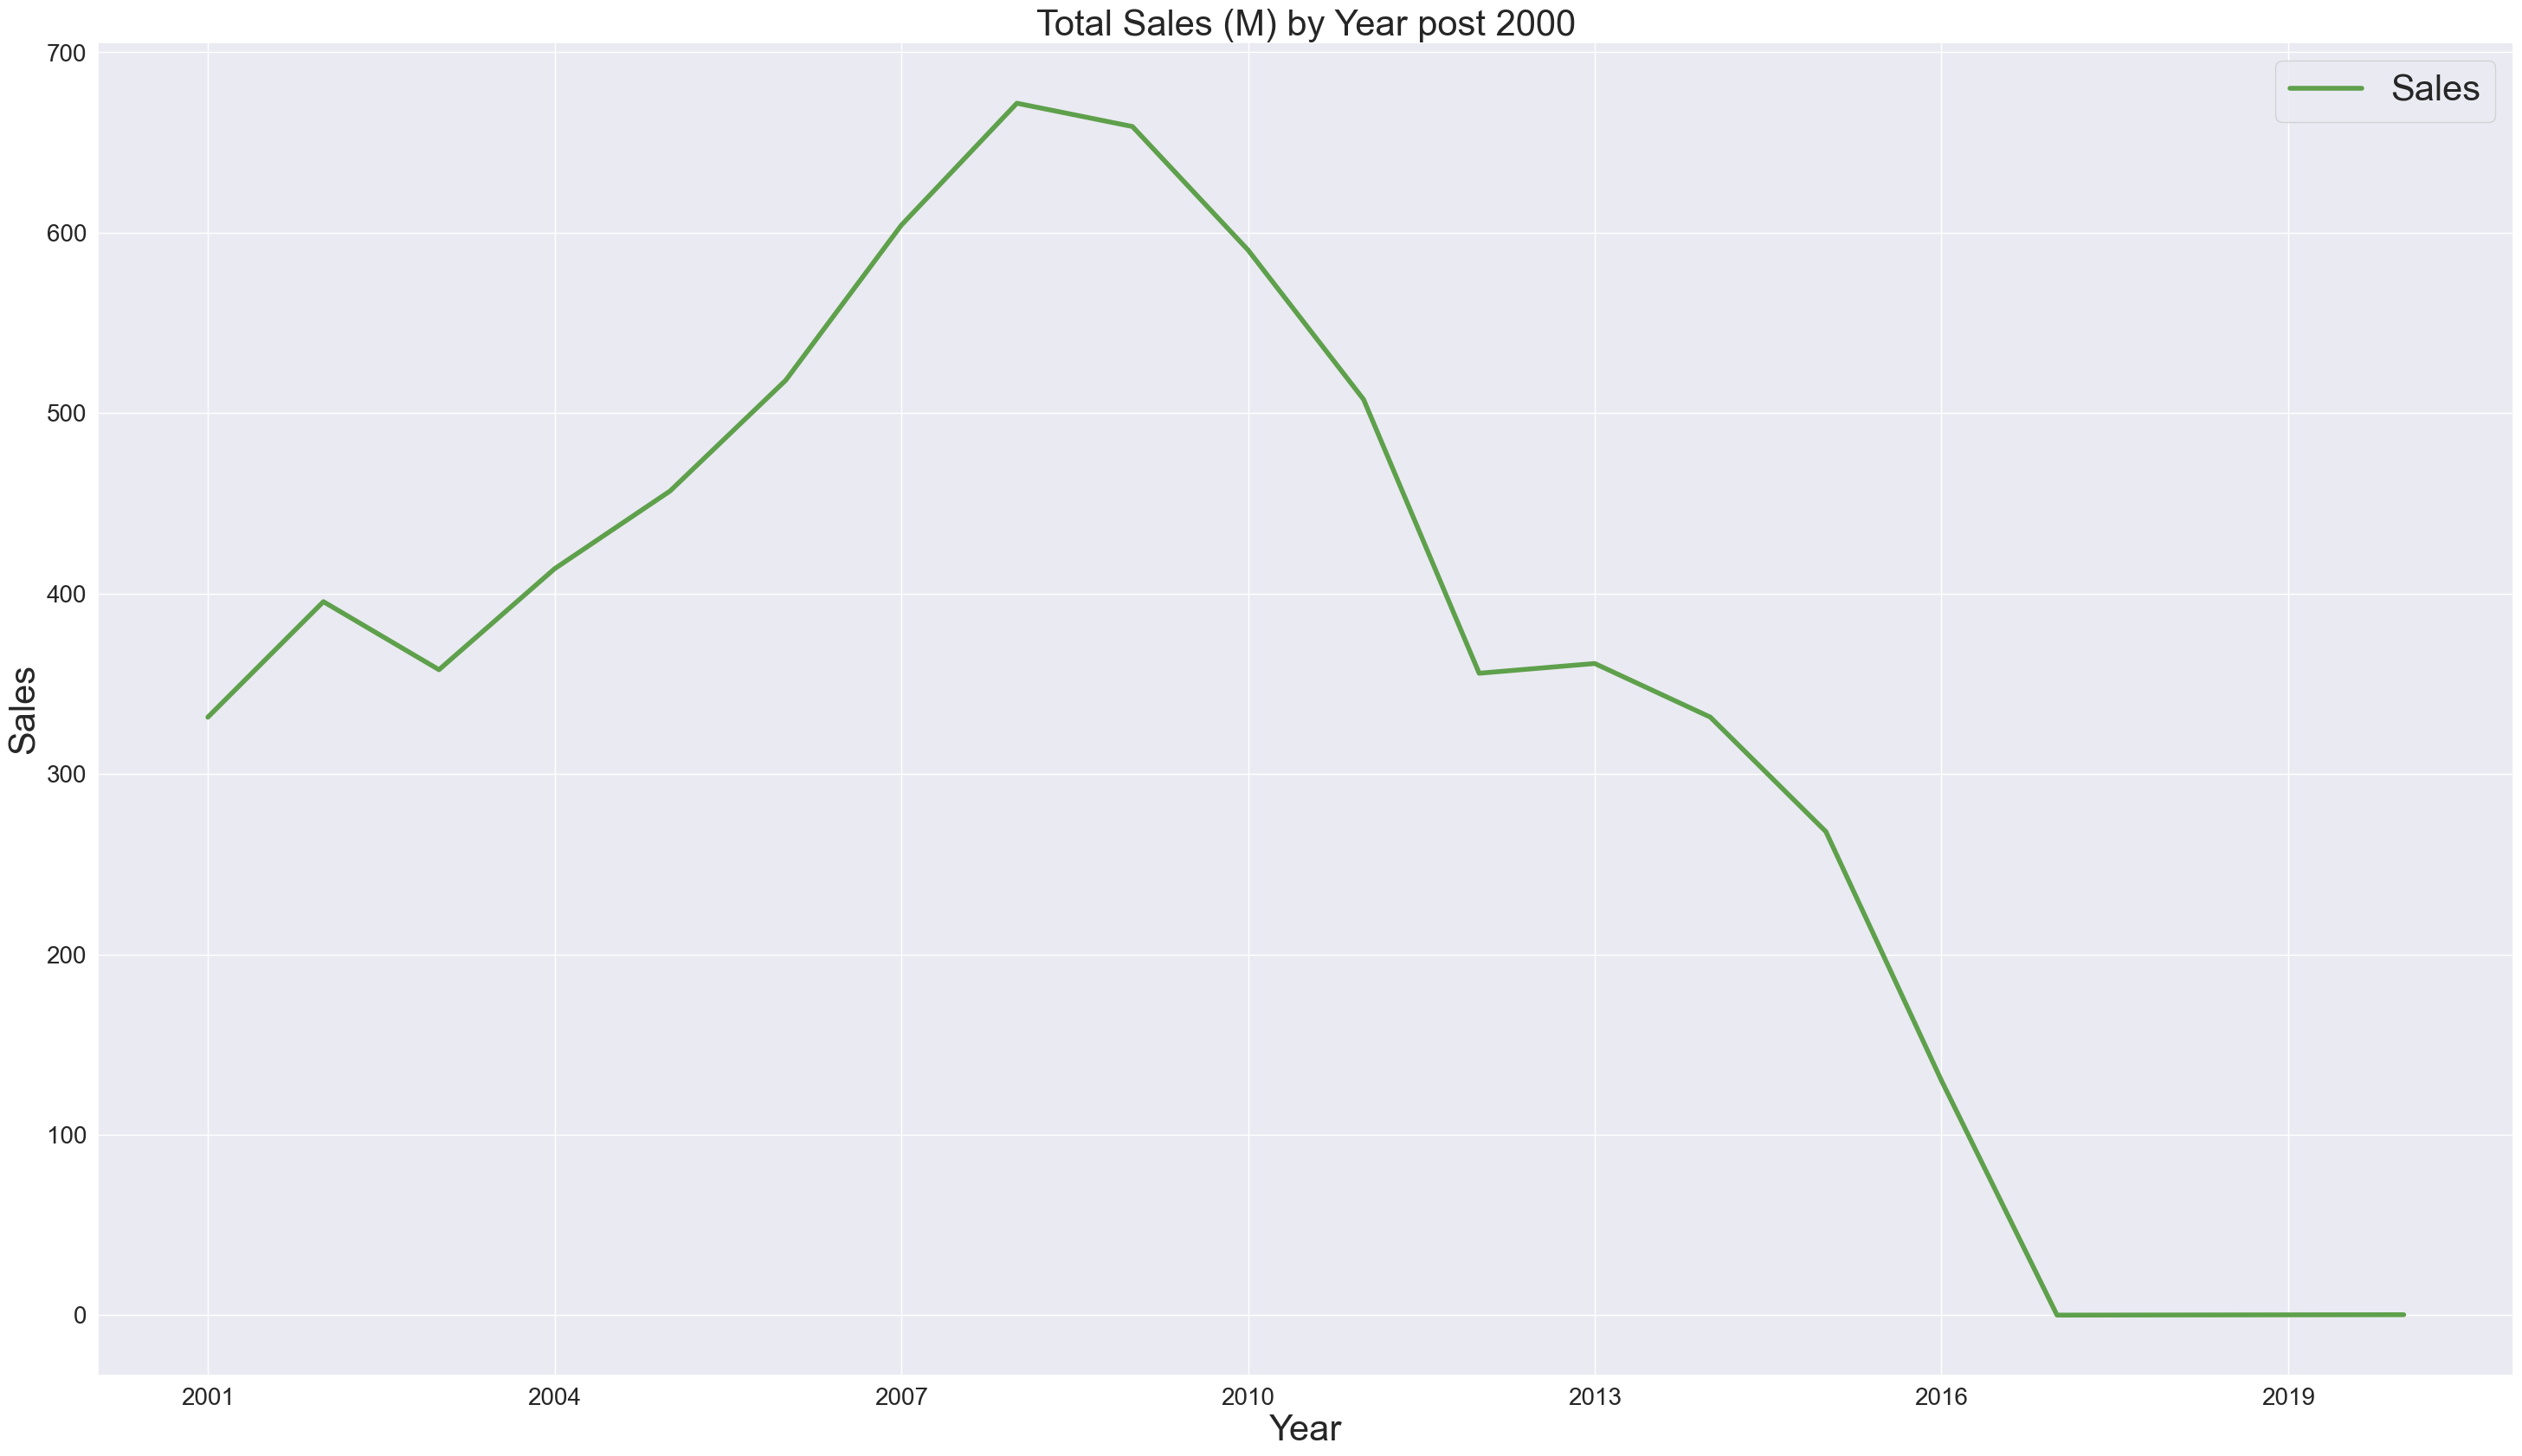

In [521]:
#importing ticker
from matplotlib.ticker import MaxNLocator

# grouping global sales by year
global_sales = df2.groupby('Year_of_Release')['Global_Sales'].sum()

# assigning axis
x_axis = global_sales.index
y_axis = global_sales.values

# define Seaborn color palette to use
palette_color = sns.color_palette('gist_earth', n_colors = 1)[0]

#plotting global sales 
plt.plot(x_axis, y_axis, label = 'Sales', color = palette_color, linewidth = 4)
plt.xlabel('Year', fontsize = 30)
plt.ylabel('Sales', fontsize = 30)
plt.title('Total Sales (M) by Year post 2000', fontsize = 30)
plt.legend(fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# cleaning x axis values
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

* there seems to be a spike between 2007 and 2010 - looking closer into geographical sales here can reveal what markets were most successful in a gaming boom

# Gaming Sales by Region

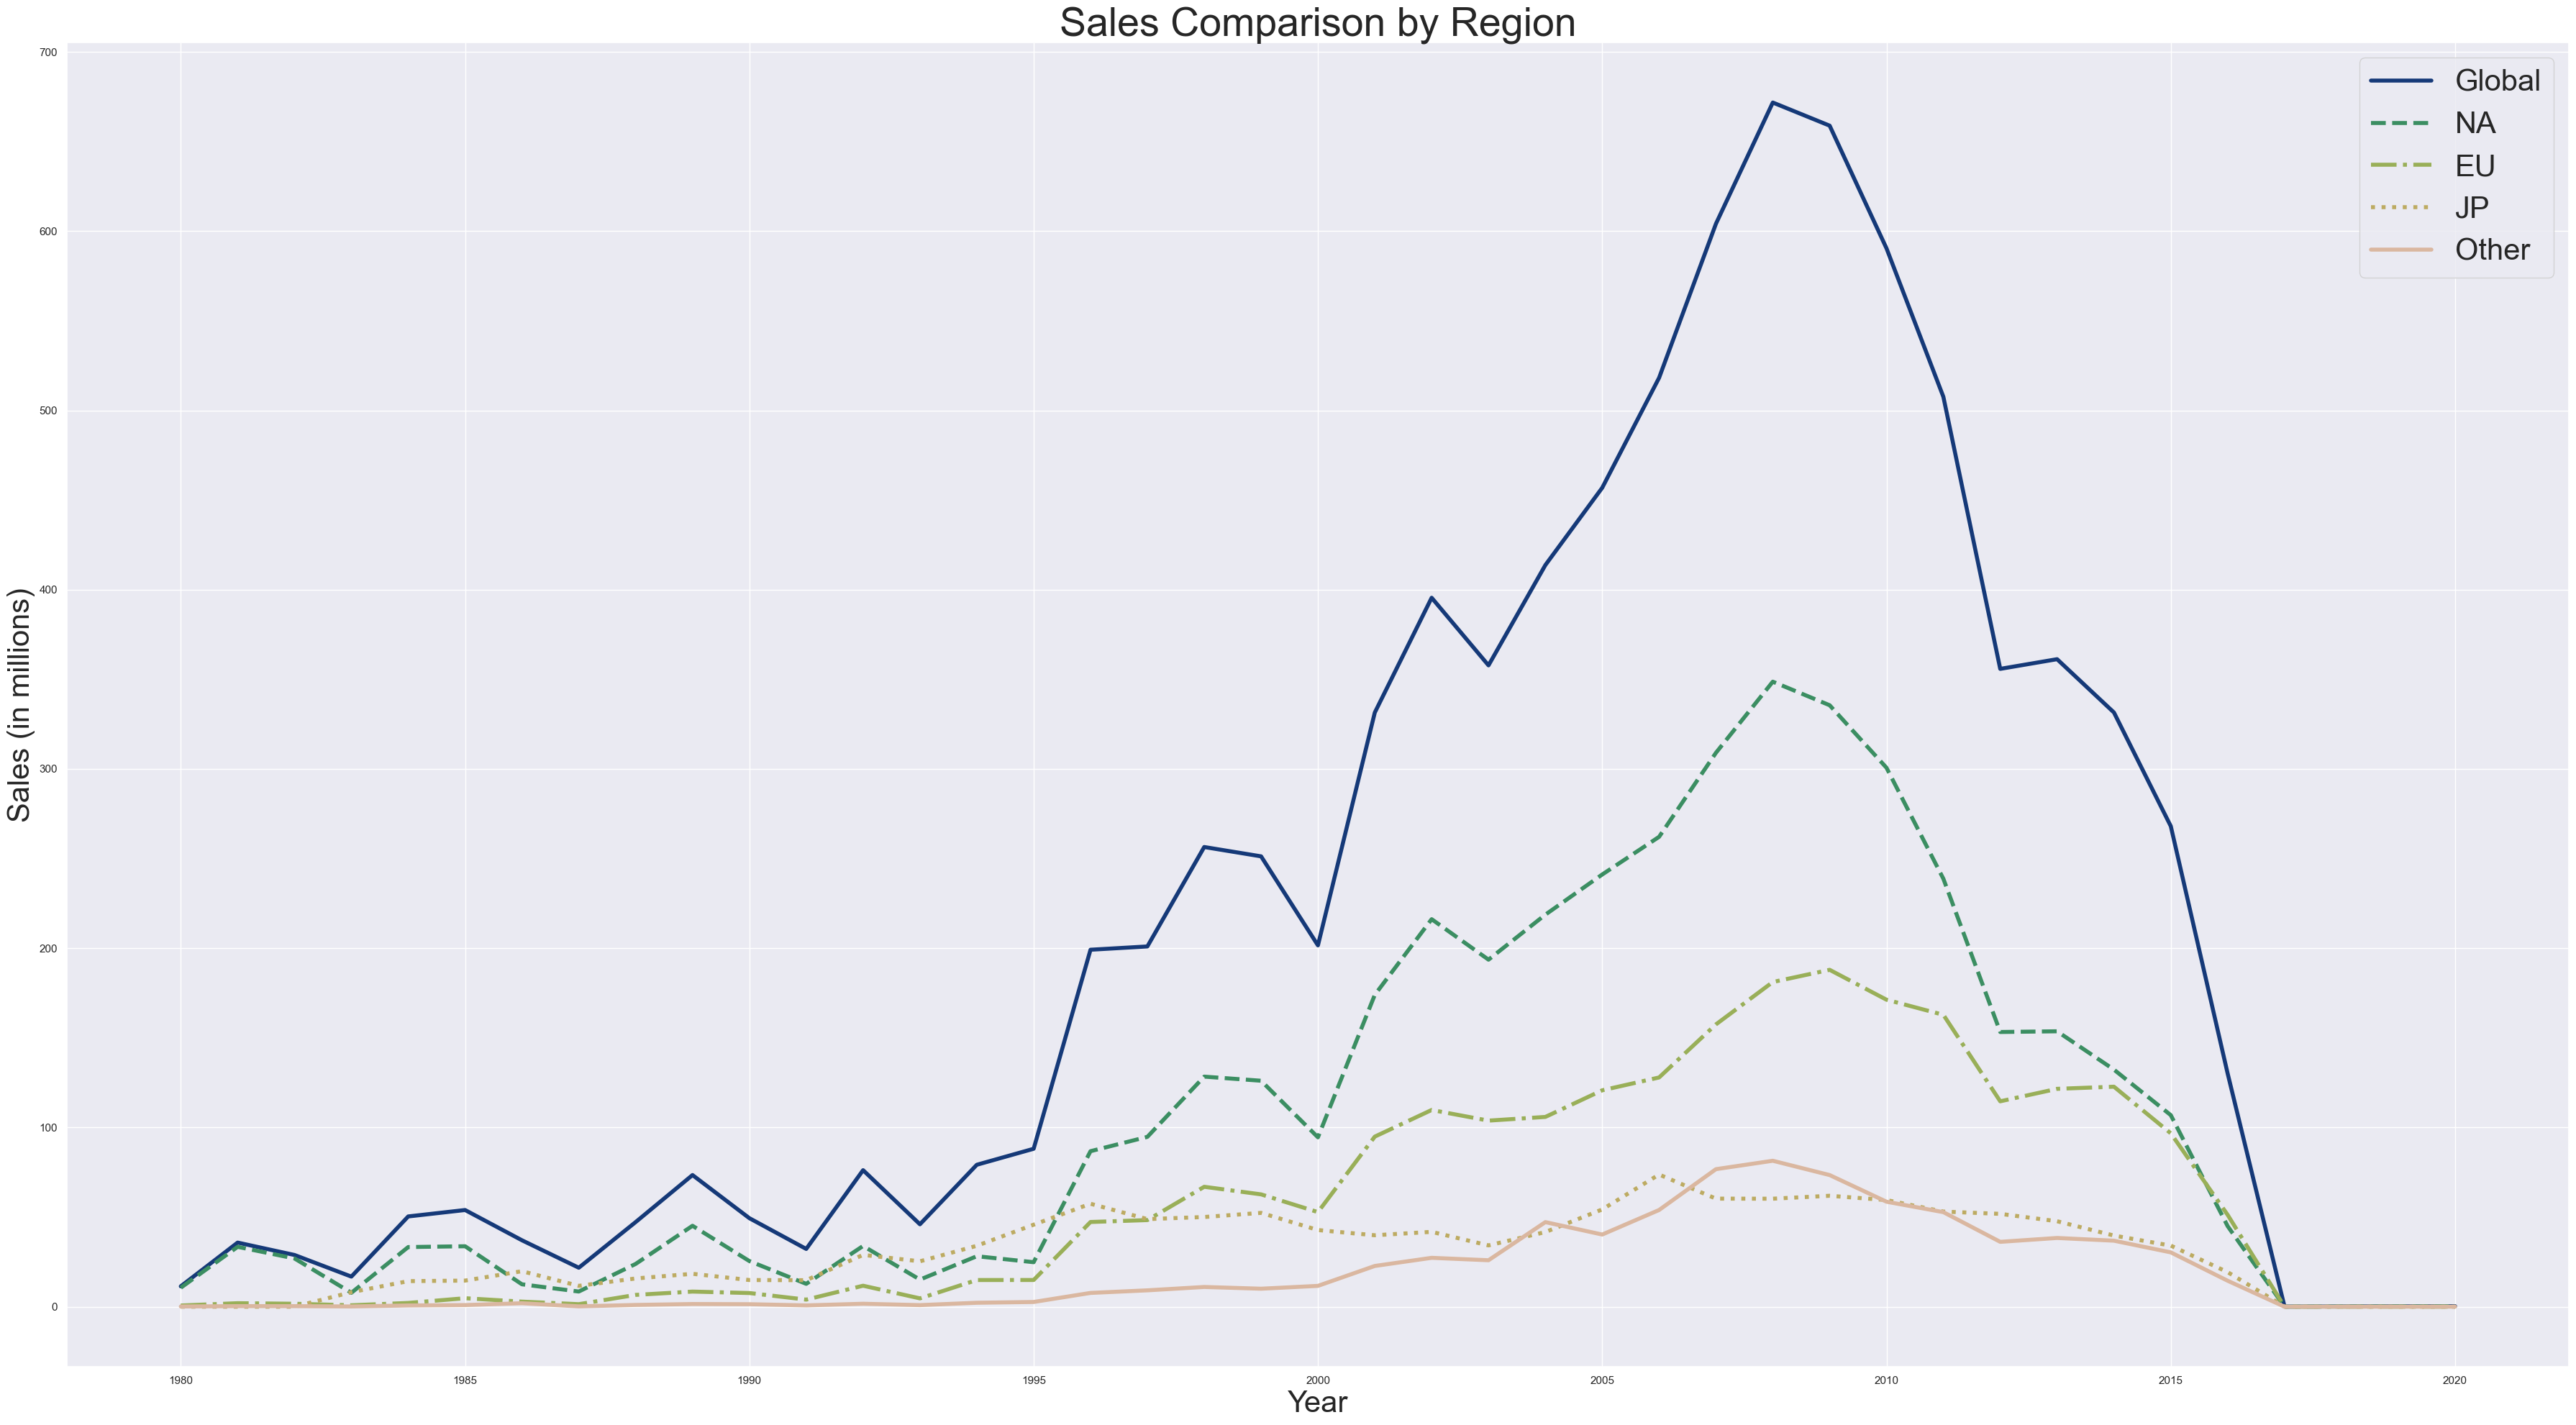

In [523]:
# Grouping sales data by year
sales_by_year = df.groupby('Year_of_Release').sum()

# Extracting regional sales
x_axis = sales_by_year.index  # Year of release
na = sales_by_year['NA_Sales']
eu = sales_by_year['EU_Sales']
jp = sales_by_year['JP_Sales']
other = sales_by_year['Other_Sales']
total = sales_by_year['Global_Sales']

# define Seaborn color palette to use
palette = sns.color_palette('gist_earth', n_colors = 7)

# Plotting sales comparison by region
plt.plot(x_axis, total, label='Global', color = palette[0], linewidth = 4)
plt.plot(x_axis, na, label='NA', color = palette[2], linestyle='--', linewidth = 4)
plt.plot(x_axis, eu, label='EU', color = palette[4], linestyle='-.', linewidth = 4)
plt.plot(x_axis, jp, label='JP', color = palette[5], linestyle=':', linewidth = 4)
plt.plot(x_axis, other, label='Other', color = palette[6], linestyle='-', linewidth = 4)

# Adding labels and title
plt.xlabel('Year', fontsize= 30)
plt.ylabel('Sales (in millions)', fontsize = 30)
plt.title('Sales Comparison by Region', fontsize = 40)
plt.legend(loc = 'upper right', fontsize = 30)
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent cutoff
plt.show()

# Regional Insights
*  NA and EU are driving sales, eith NA seeing rapid growth in the mid 2000s 
* Other and Japan see pretty consistent and flatter growth in parison with Other countries surpassing Japan sales in 2009

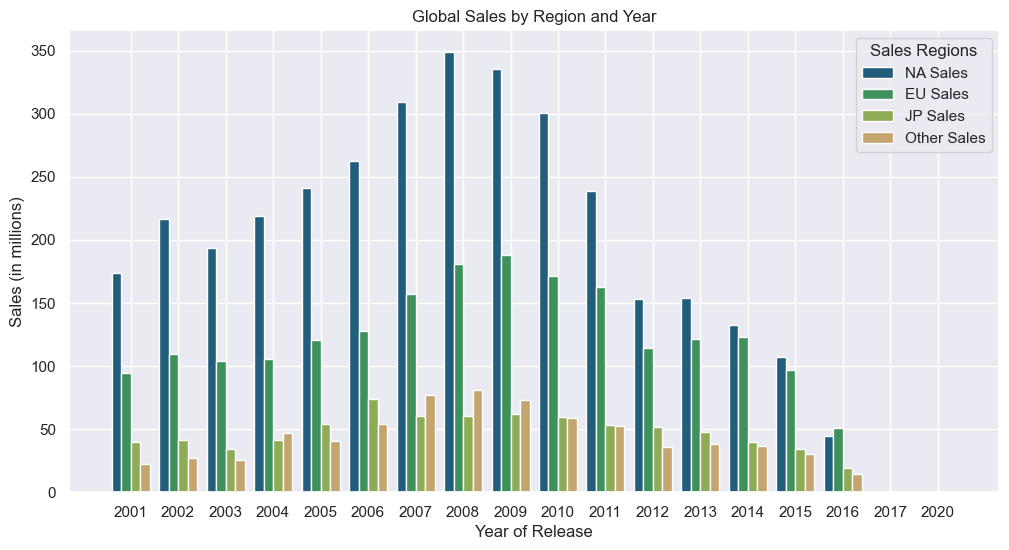

In [525]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df2' contains columns for 'Year_of_Release' and different sales data like 'NA_Sales', 'EU_Sales', 'JP_Sales', etc.
# Group by 'Year_of_Release' and sum the sales data
sales_by_region = df2.groupby('Year_of_Release')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Define positions for the bars on the x-axis (the width of each bar is set by 'bar_width')
years = sales_by_region.index
bar_width = 0.2  # Width of each bar
index = np.arange(len(years))  # X-axis positions

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# define Seaborn color palette to use
palette = sns.color_palette('gist_earth', n_colors = 4)

# Plot each sales region as a separate bar
ax.bar(index, sales_by_region['NA_Sales'], bar_width, label='NA Sales', color = palette[0])
ax.bar(index + bar_width, sales_by_region['EU_Sales'], bar_width, label='EU Sales', color = palette[1])
ax.bar(index + 2 * bar_width, sales_by_region['JP_Sales'], bar_width, label='JP Sales', color = palette[2])
ax.bar(index + 3 * bar_width, sales_by_region['Other_Sales'], bar_width, label='Other Sales', color = palette[3])

# Set the labels and title
ax.set_xlabel('Year of Release')
ax.set_ylabel('Sales (in millions)')
ax.set_title('Global Sales by Region and Year')

# Set the x-axis ticks to the years and make them appear centered
ax.set_xticks(index + 1.5 * bar_width)  # Centers the labels in the middle of the cluster
ax.set_xticklabels(years)

# Add a legend
ax.legend(title='Sales Regions')

# Show the plot
plt.show()

* now would be a good time to isolate 2007-2008 and see what platforms and genres were most successful during what i will call a gaming boom 

In [527]:
#filtering the table to capture gaming boom between 2007-08

gaming_boom = df[(df['Year_of_Release'] >= 2007) & (df['Year_of_Release'] <= 2010)]
gaming_boom

,Name,Platform,Platforms_Clean,Developer,Rating,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
2,Mario Kart Wii,Wii,Nintendo Wii,Nintendo,E,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.00
3,Wii Sports Resort,Wii,Nintendo Wii,Nintendo,E,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.00
8,New Super Mario Bros. Wii,Wii,Nintendo Wii,Nintendo,E,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.00
13,Wii Fit,Wii,Nintendo Wii,Nintendo,E,2007,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.00
14,Kinect Adventures!,X360,Xbox 360,Good Science Studio,E,2010,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,Mezase!! Tsuri Master DS,DS,Nintendo DS,NaN,NaN,2009,Sports,Hudson Soft,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,nan
16705,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,PlayStation Portable,NaN,NaN,2007,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,nan
16708,Plushees,DS,Nintendo DS,Big John Games,E,2008,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01,NaN,NaN,tbd,nan
16709,15 Days,PC,Personal Computer,DTP Entertainment,NaN,2009,Adventure,DTP Entertainment,0.00,0.01,0.00,0.00,0.01,63.0,6.0,5.8,8.00


# Gaming Developer Deep-Dive

In [435]:
# group global releases by developper

Developer = gaming_boom['Developer'].value_counts().sort_values(ascending = False).head(10)
Developer 

Developer
Ubisoft             77
EA Canada           67
Konami              54
EA Tiburon          53
Electronic Arts     47
THQ                 46
Activision          43
Ubisoft Montreal    42
Visual Concepts     35
FUN Labs            35
Name: count, dtype: int64

# Developer Volume Insights
* Ubisoft, EA Canada, Konami, and EA Tiburon have release the highest number of games during the gaming boom 

In [532]:
# group global sales by developper

top_dev = gaming_boom.groupby('Developer')['Global_Sales'].sum().sort_values(ascending = False).head(8)
top_dev 

Developer
Nintendo            184.02
Ubisoft Montreal     48.22
Treyarch             46.40
EA Canada            45.05
EA Tiburon           44.89
Infinity Ward        42.09
Ubisoft              41.61
Capcom               34.87
Name: Global_Sales, dtype: float64

In [735]:
# identifying total sales for games with an assigned developer
total_sales = top_dev.sum()
print(f'Total Sales by Developer: {total_sales}')

# calculating Nintendo market share
nintendo_share = (184.02/total_sales)* 100
print(f'Nintendo Share: {nintendo_share}')

Total Sales by Developer: 487.15
Nintendo Share: 37.774812686031


Text(0.5, 1.0, 'Top Developers by Sales (M) 2007-2010')

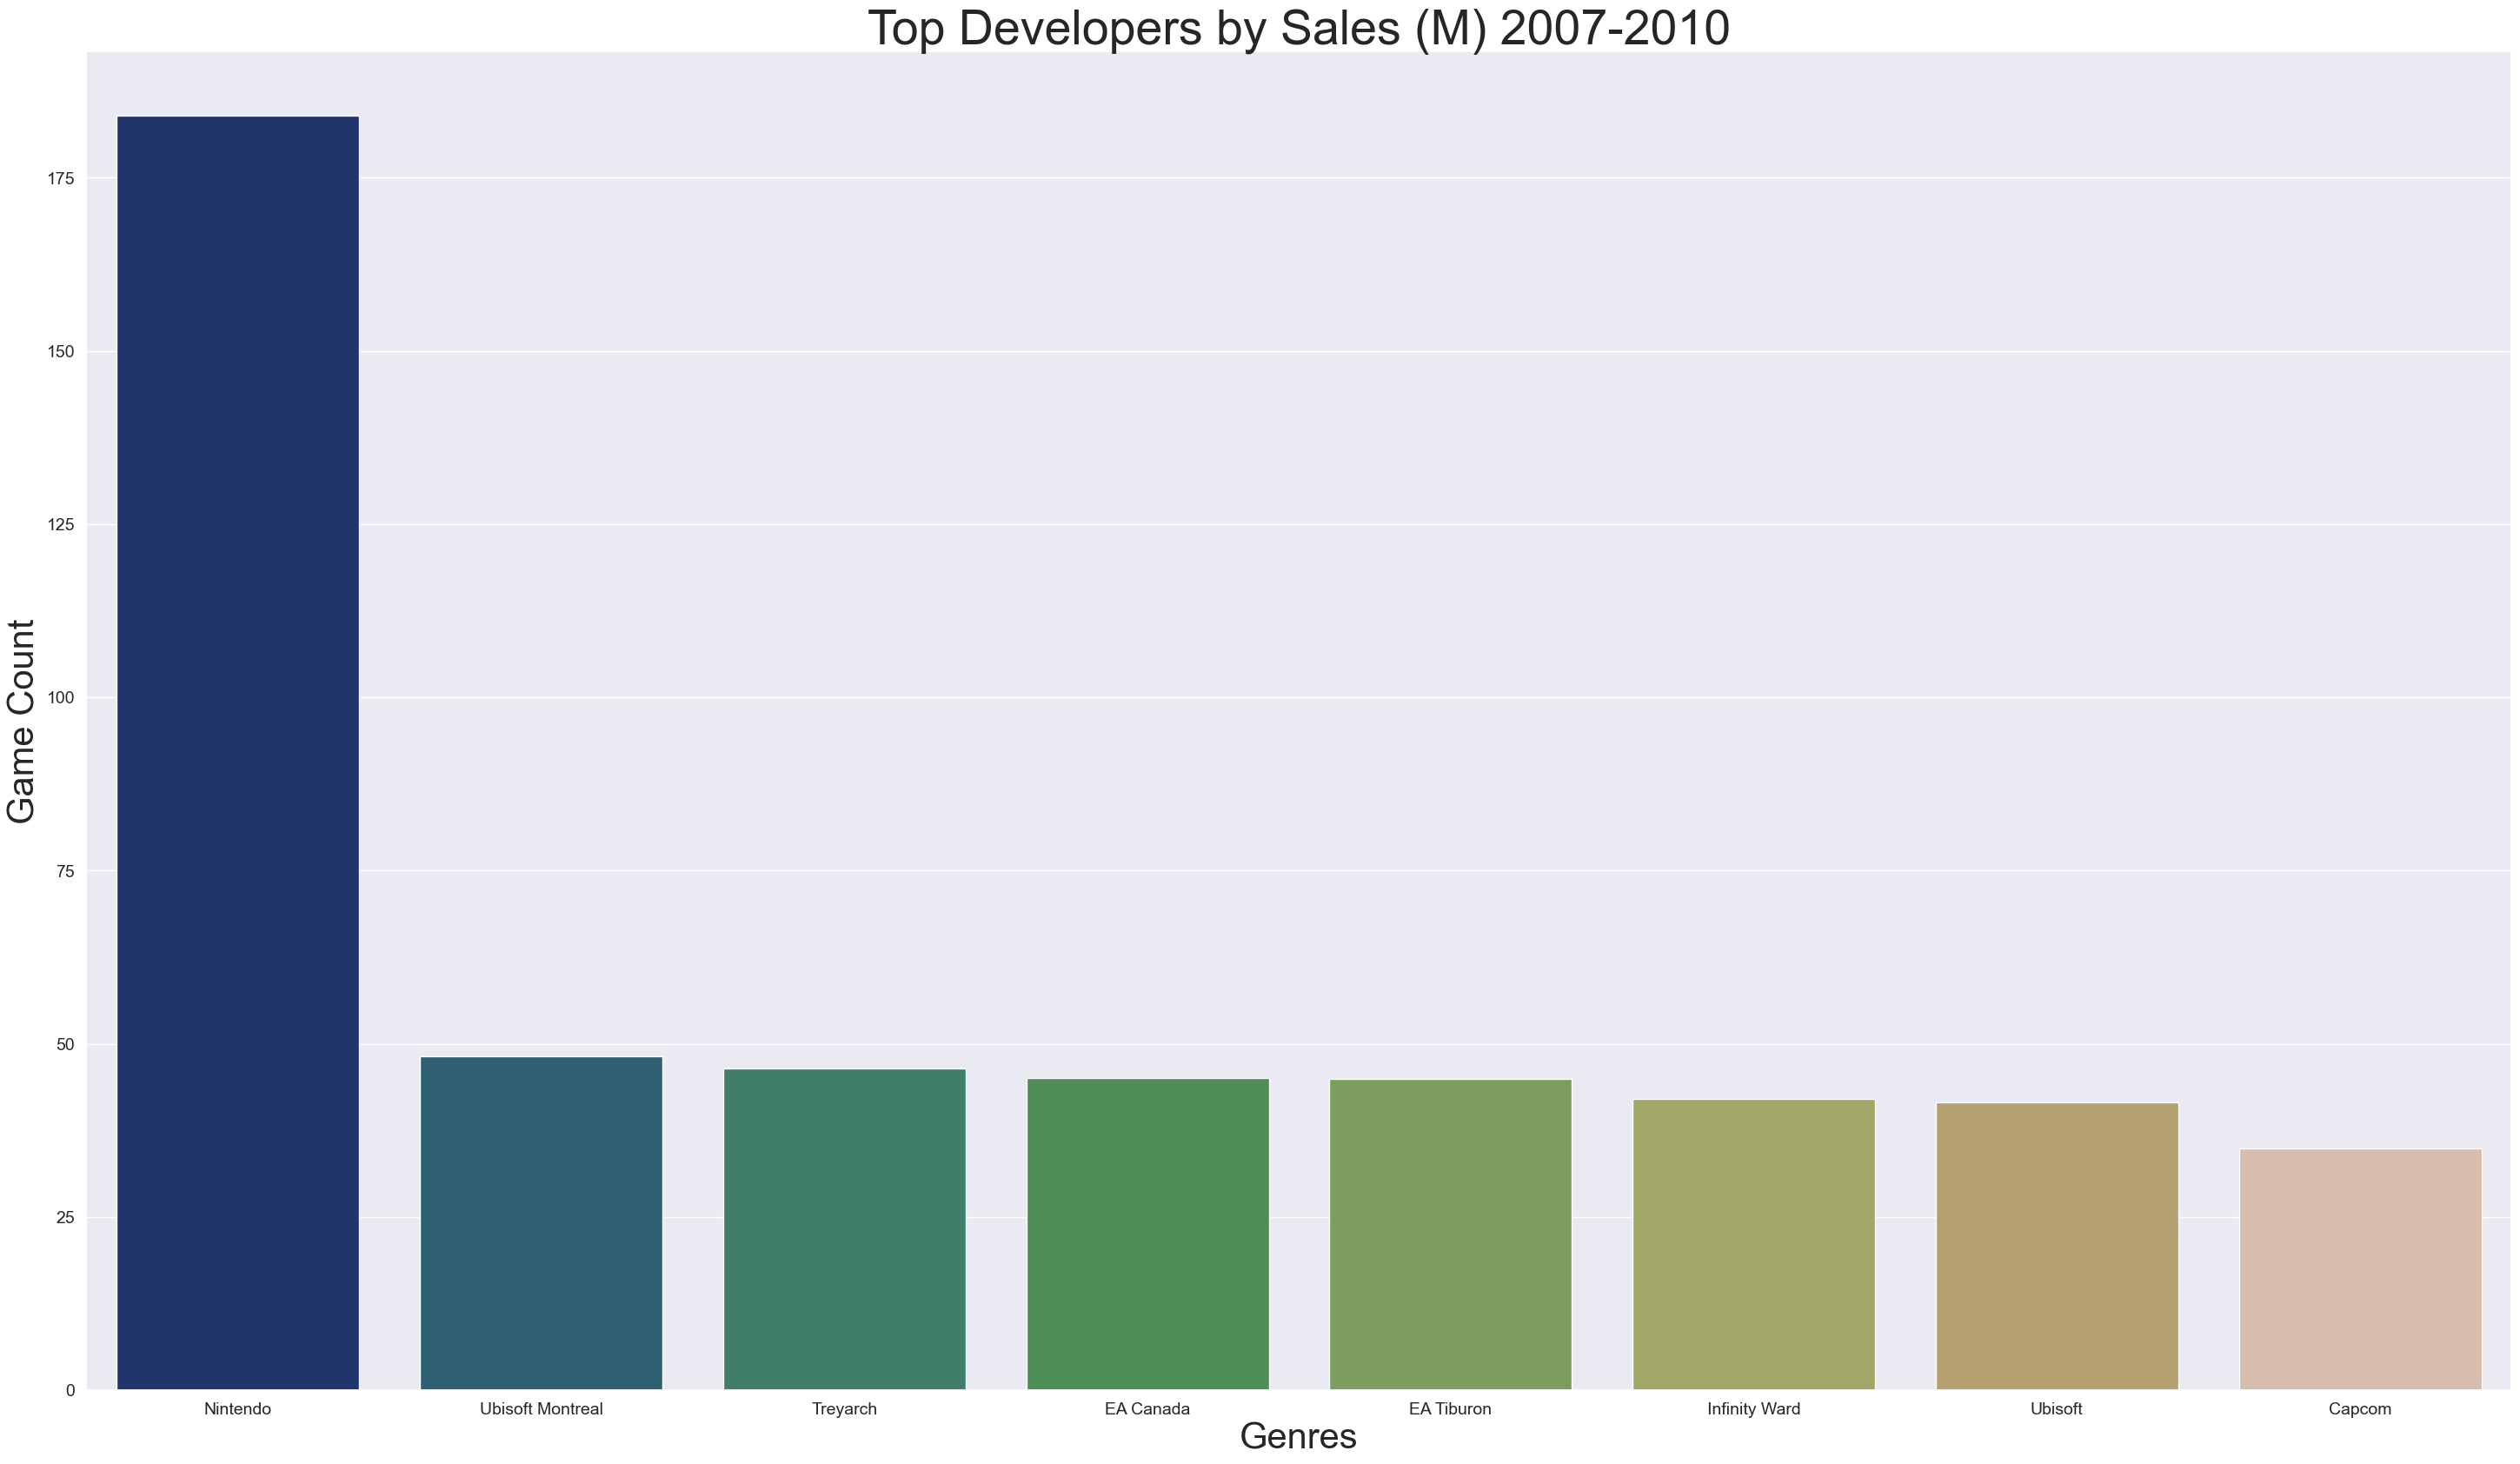

In [558]:
# define Seaborn color palette to use
palette_color = sns.color_palette('gist_earth', n_colors = 1)[0]

# plot values in a Seaborn barplot 
sns.barplot(x = top_dev.index, y = top_dev.values, hue = top_dev.index, palette = "gist_earth", legend = False, estimator = np.sum)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Genres', fontsize = 30)
plt.ylabel('Game Count',fontsize = 30)
plt.title('Top Developers by Sales (M) 2007-2010', fontsize = 40) 

# Developer Sales Insights
* Nintendo is the most successful developer of the gaming boom 2007-2010 with 37% of the market share
* Ubisoft Montral, Treyarch, and EA Canda are highly competitive amongst themselves and perform similarly in terms of sales, though they are unlikely to catch up to Nintendo

# Platform Deep Dive

In [762]:
# Grouping global platform sales by year 
platforms_ofall_time = df.groupby('Platforms_Clean')['Global_Sales'].sum().sort_values(ascending = False).head(10)
platforms_ofall_time

Platforms_Clean
PlayStation 2           1233.46
Xbox 360                 961.39
PlayStation 3            931.15
Nintendo Wii             891.74
Nintendo DS              803.73
PlayStation              727.41
PlayStation 4            314.23
Game Boy Advance         305.62
PlayStation Portable     289.79
Nintendo 3DS             257.92
Name: Global_Sales, dtype: float64

Text(0.5, 1.0, 'Top Platforms of All Time by Sales')

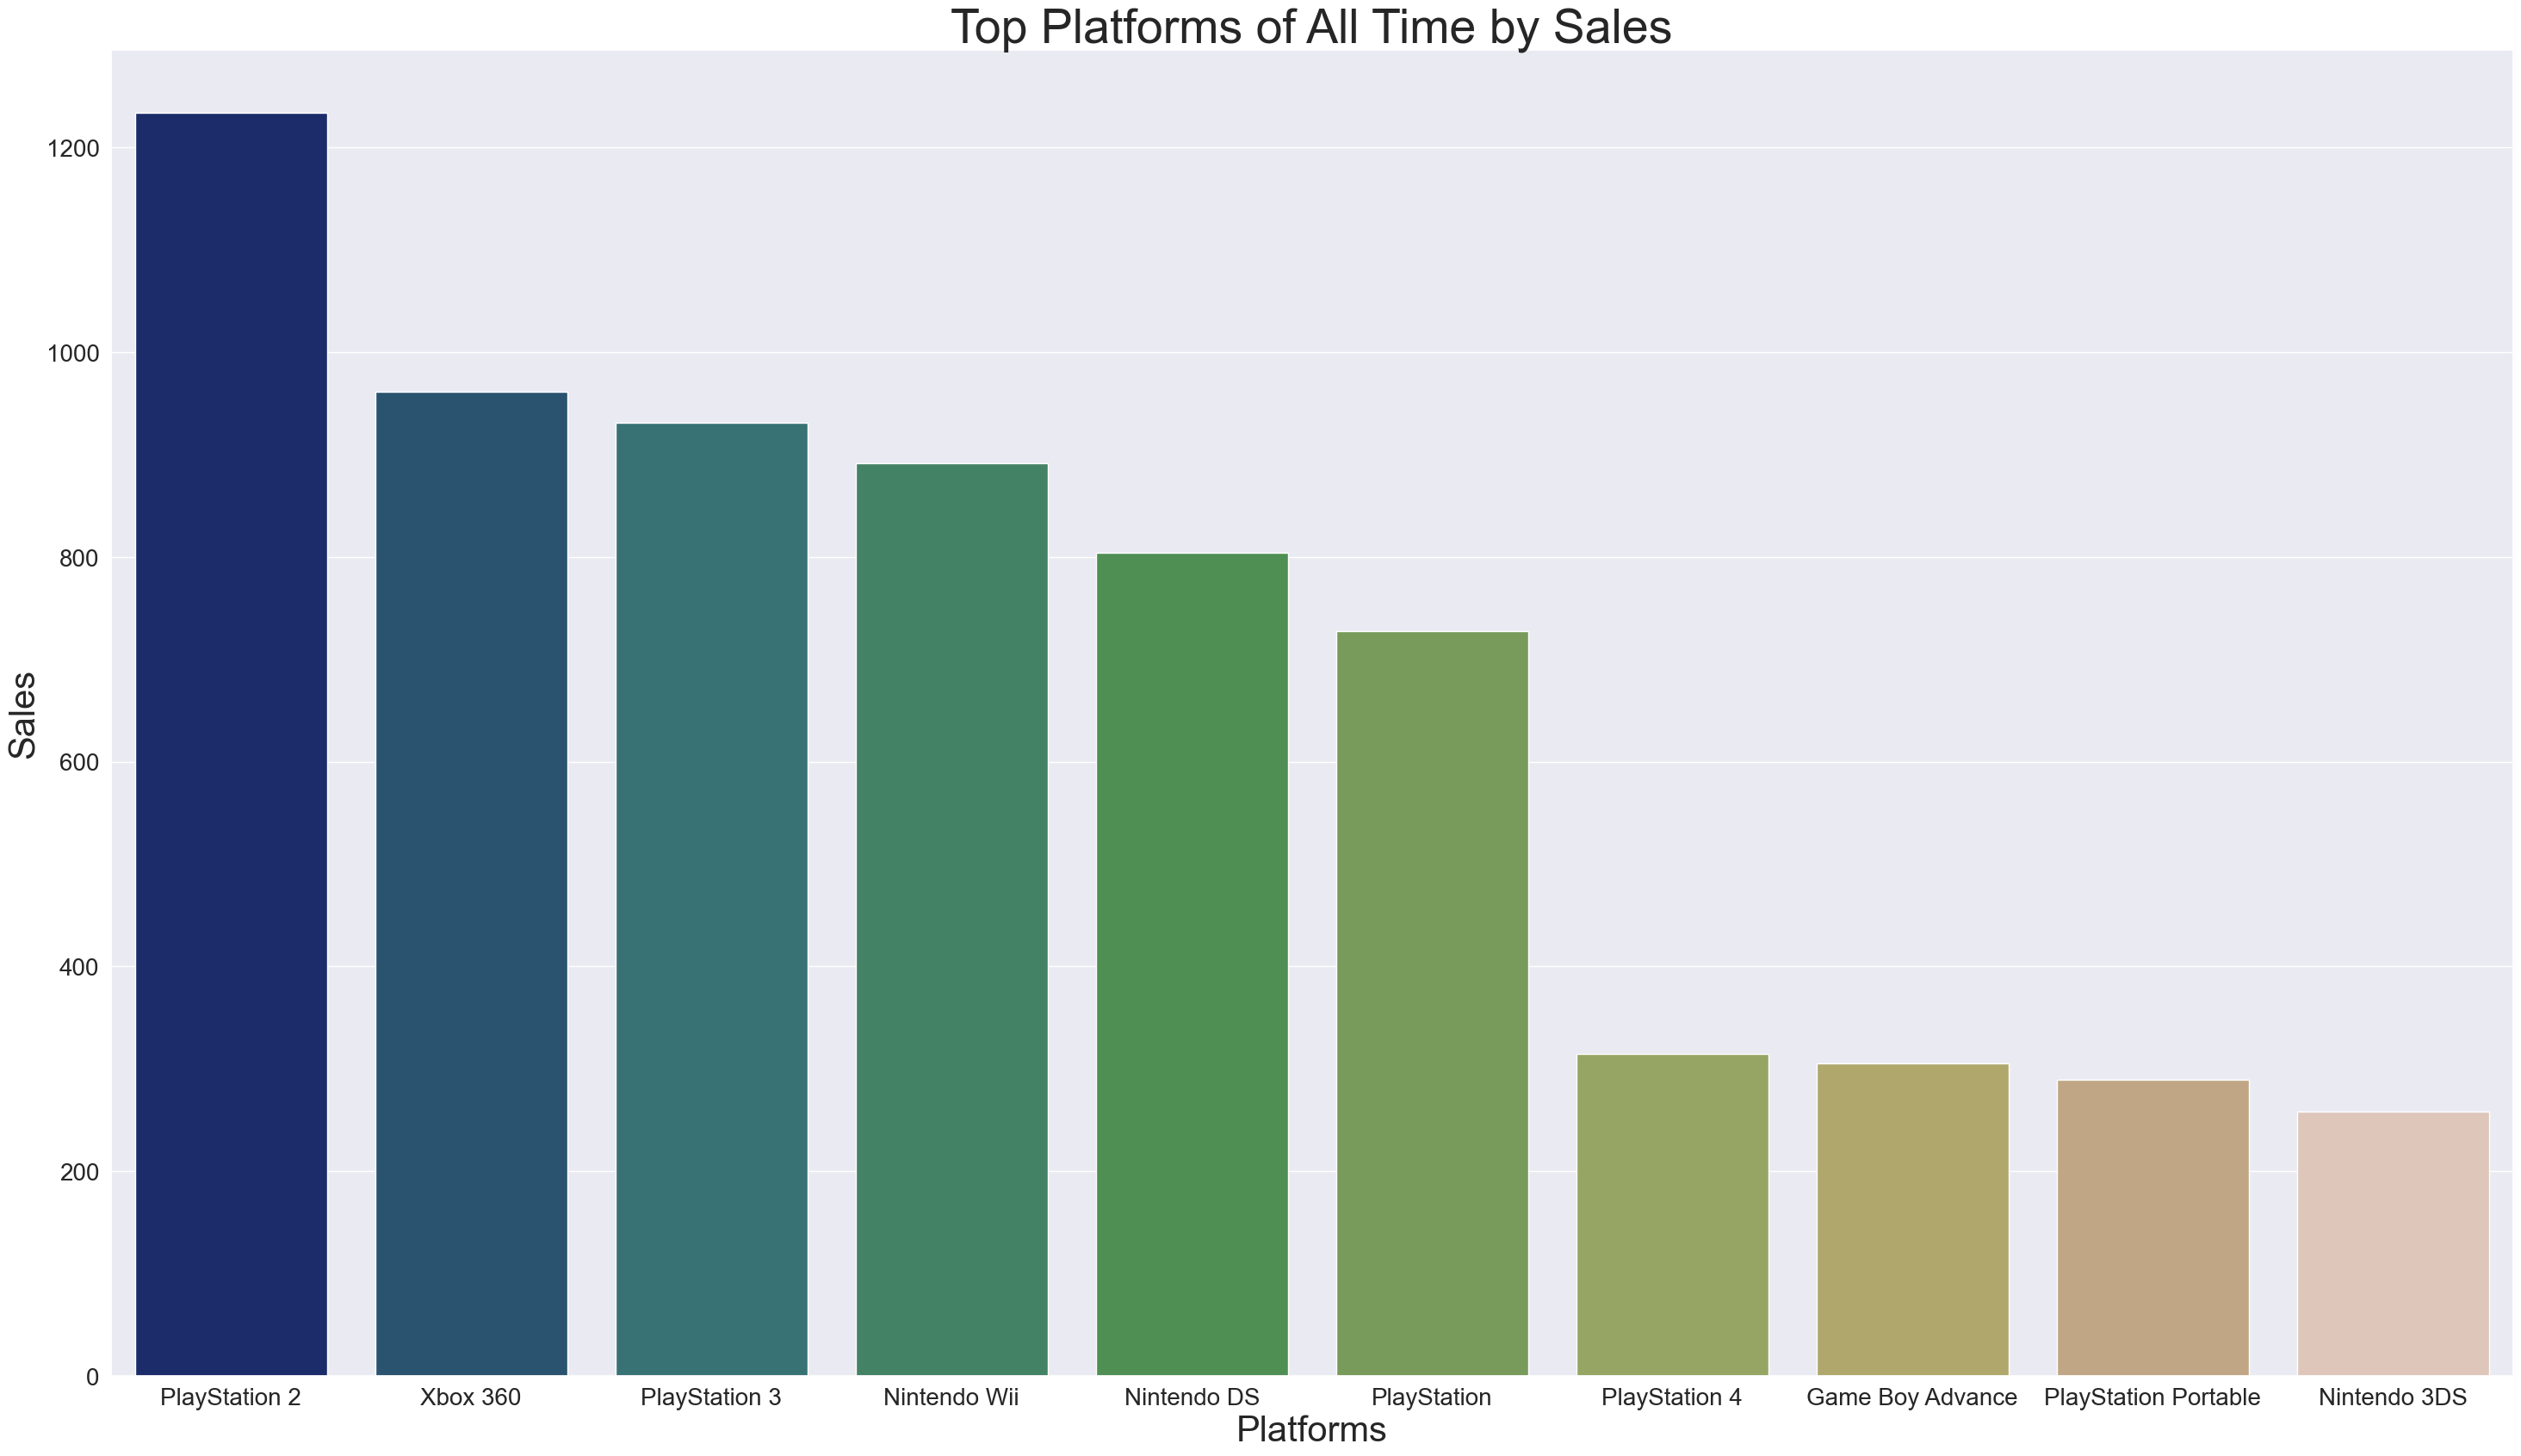

In [768]:
# assigning x and y variables

# plotting top 10 platforms of all time
sns.barplot(x = platforms_ofall_time.index, y = platforms_ofall_time.values, hue = platforms_ofall_time.index, palette = "gist_earth", legend = False, estimator = np.sum)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Platforms', fontsize = 30)
plt.ylabel('Sales',fontsize = 30)
plt.title('Top Platforms of All Time by Sales', fontsize = 40) 

* PlayStation 2, Xbox 360, and PlayStation 3 are the highest selling platforms of all time
* At home consoles have been the anchor of the gaming industry over time

In [770]:
# Top Platforms by Game Count between 2007-2010

platforms = gaming_boom['Platforms_Clean'].value_counts().sort_values(ascending = False)
platforms 

Platforms_Clean
Nintendo DS             1594
Nintendo Wii            1045
Xbox 360                 623
PlayStation Portable     582
PlayStation 3            571
PlayStation 2            539
Personal Computer        333
Game Boy Advance           5
Xbox                       4
Nintendo GameCube          4
Sega Dreamcast             2
Name: count, dtype: int64

Text(0.5, 1.0, 'Top Platforms by Game Count 2007-2010')

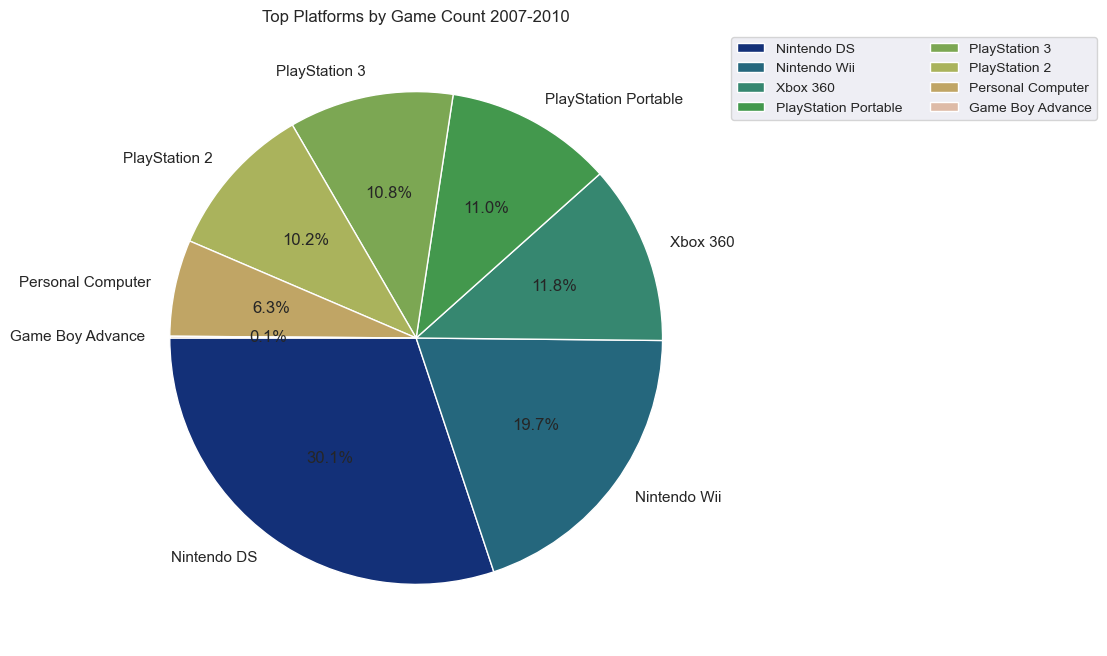

In [263]:
# plotting the top platforms by game releases

plt.figure(figsize = (20,8))
palette = sns.color_palette('gist_earth', len(platforms))
plt.pie(platforms, labels = platforms.index, colors = palette, autopct='%1.1f%%', startangle = 180)
plt.legend(loc = 2, fontsize = 10, bbox_to_anchor = (1,1), ncol = 2)
plt.title('Top Platforms by Game Count 2007-2010')

* In terms of # of games released, Nintendo DS and Ninento Wii are the top platforms, followed by Xbox 350, and Play Station
* Mobile gaming emerges as a signifcant player in the gaming boom with Nintendo DS and PlayStation Portable 
* Platforms like Cboc, GameCube, and Sega are clearly phasing out post 2000

# Top Platforms by Sales between 2007-2010

In [739]:
# Grouping global sales by year 
top_platforms = gaming_boom.groupby('Platforms_Clean')['Global_Sales'].sum().sort_values(ascending = False).head(8)
top_platforms 

Platforms_Clean
Nintendo Wii            659.60
Xbox 360                521.04
Nintendo DS             497.15
PlayStation 3           464.89
PlayStation 2           161.91
PlayStation Portable    154.33
Personal Computer        63.06
Game Boy Advance          2.22
Name: Global_Sales, dtype: float64

In [730]:
# summing market share of mobile platforms: Nintendo DS, PlayStation Portable, and Nintendo Game Cube
mobile_platforms = 497.15 + 154.33 + 3.43
print(f'Mobile Platform Sales: {mobile_platforms}')

# summing total market sales
platforms_sales = top_platforms.sum()
print(f'Total Platform Sales: {platforms_sales}')

#calculating mobile market share 
mobile_share = (mobile_platforms/platforms_sales)*100
print(f'Mobile Platform Market Share: {mobile_share}')

Mobile Platform Sales: 654.91
Total Platform Sales: 2225.98
Mobile Platform Market Share: 29.42119875290883


Text(0.5, 1.0, 'Top Platforms by Sales 2007-2010')

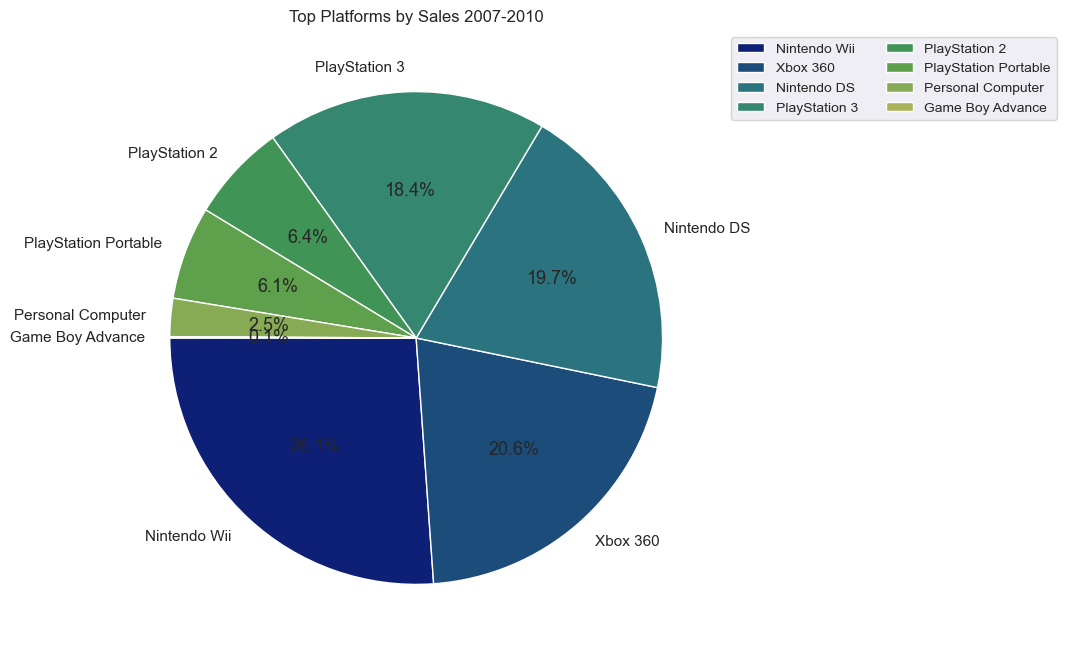

In [743]:
# plotting platforms by sales 

plt.figure(figsize=(20,8))
palette = sns.color_palette('gist_earth', len(platforms))
plt.pie(top_platforms, labels = top_platforms.index, colors = palette, autopct='%1.1f%%', startangle=180)
plt.legend(loc=2, fontsize=10, bbox_to_anchor=(1,1),ncol=2)
plt.title('Top Platforms by Sales 2007-2010')

# Gaming Platform Insights
* PlayStation 2, Xbox 360, and PlayStation 3 are the highest selling platforms of all time
* Ninentdo DS is the most common platform for game releases - as one of Nintendo's most successful portable consoles, a variety of game releases kept users engaged
* Ninendo Wii, Xbox 360, and Nintendo DS were the most successful platforms by sales - highlighting Nintendo's success amongst users and critics 
* Mobile gaming began its rise during the gaming boom with 30% of the market at its peak

# Top Gaming Genres of All Time 

In [780]:
# counting games per genre

top_genres = df['Genre'].value_counts().sort_values(ascending = False)
top_genres

Genre
Action          3307
Sports          2306
Misc            1697
Role-Playing    1483
Shooter         1296
Adventure       1291
Racing          1225
Platform         878
Simulation       855
Fighting         837
Strategy         672
Puzzle           569
Name: count, dtype: int64

Text(0.5, 1.0, 'Top Genres of All Time by Volume')

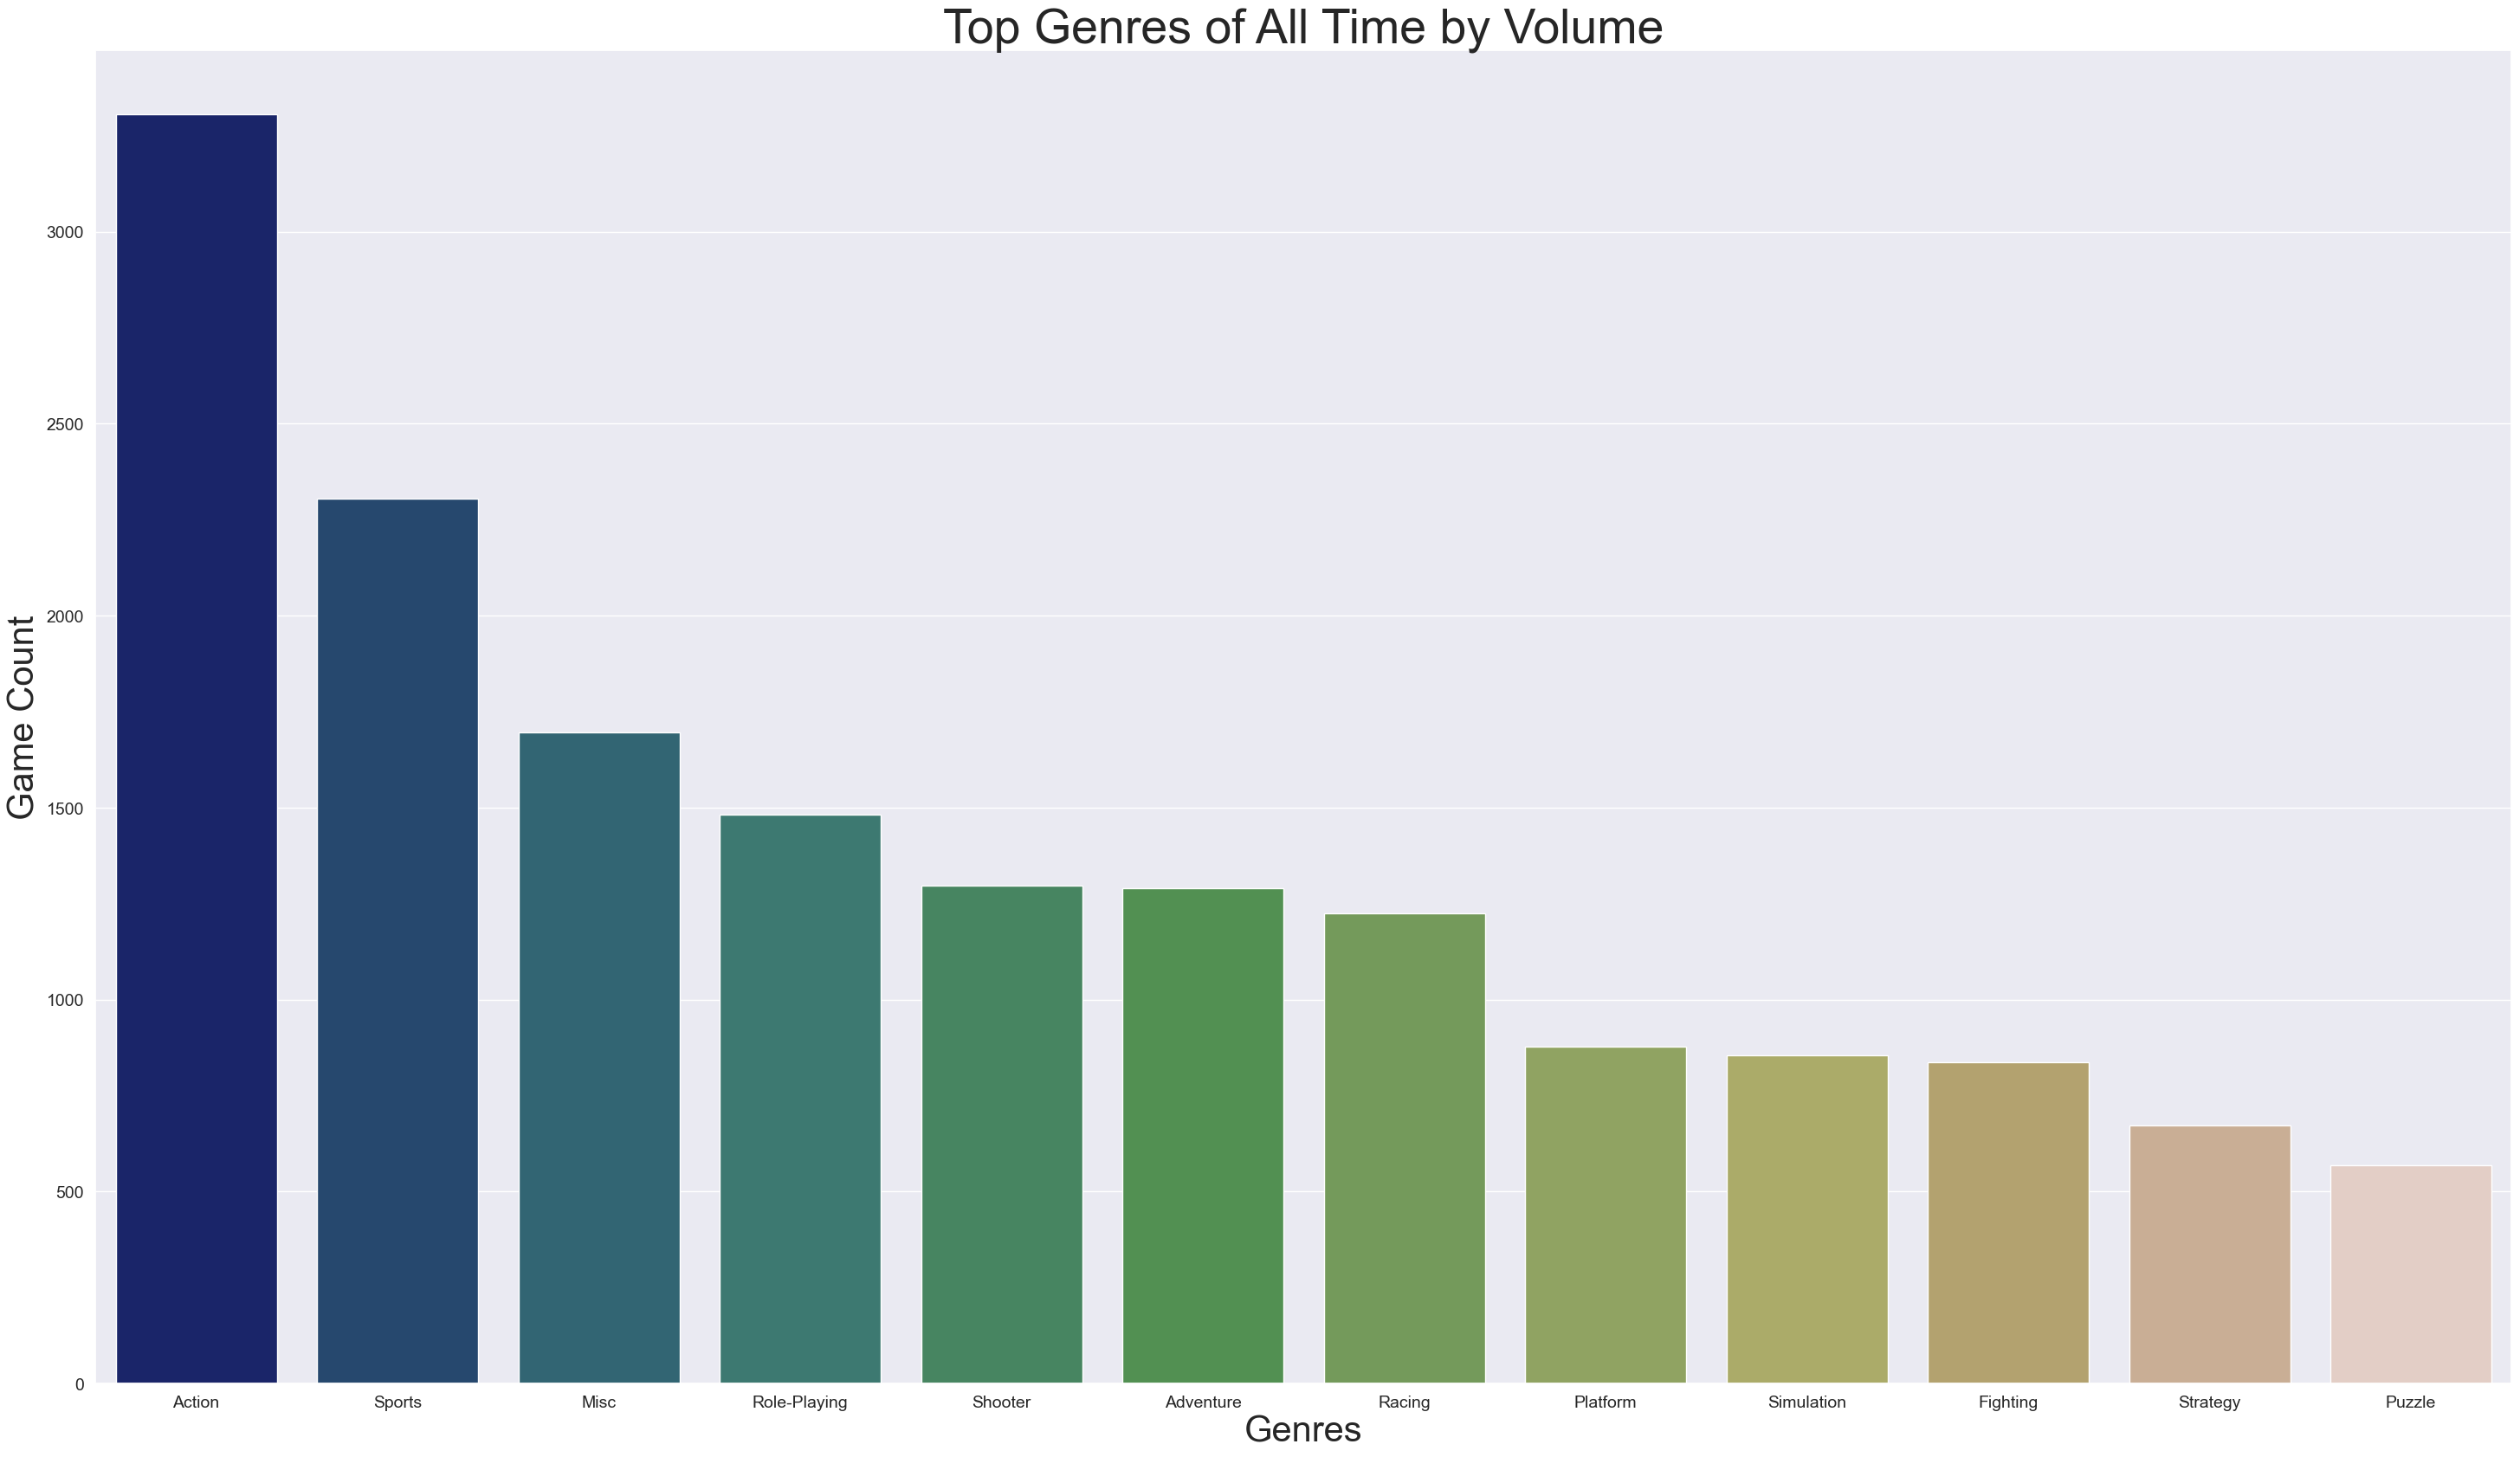

In [675]:
# plotting top genres by volume

# define Seaborn color palette to use
palette_color = sns.color_palette('gist_earth', n_colors = 1)[0]

# plot values in a Seaborn barplot 
sns.barplot(x = top_genres.index, y = top_genres.values, hue = top_genres.index, palette = "gist_earth", legend = False, estimator = np.sum)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Genres', fontsize = 30)
plt.ylabel('Game Count',fontsize = 30)
plt.title('Top Genres of All Time by Volume', fontsize = 40) 

In [663]:
# sales per genre

bestselling_genres = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending = False)
bestselling_genres

Genre
Action          1717.62
Sports          1310.39
Shooter         1041.83
Role-Playing     930.90
Platform         825.86
Misc             783.19
Racing           723.69
Fighting         442.63
Simulation       388.22
Puzzle           240.33
Adventure        233.25
Strategy         172.69
Name: Global_Sales, dtype: float64

Text(0.5, 1.0, 'Top Genres of All Time by Sales (M)')

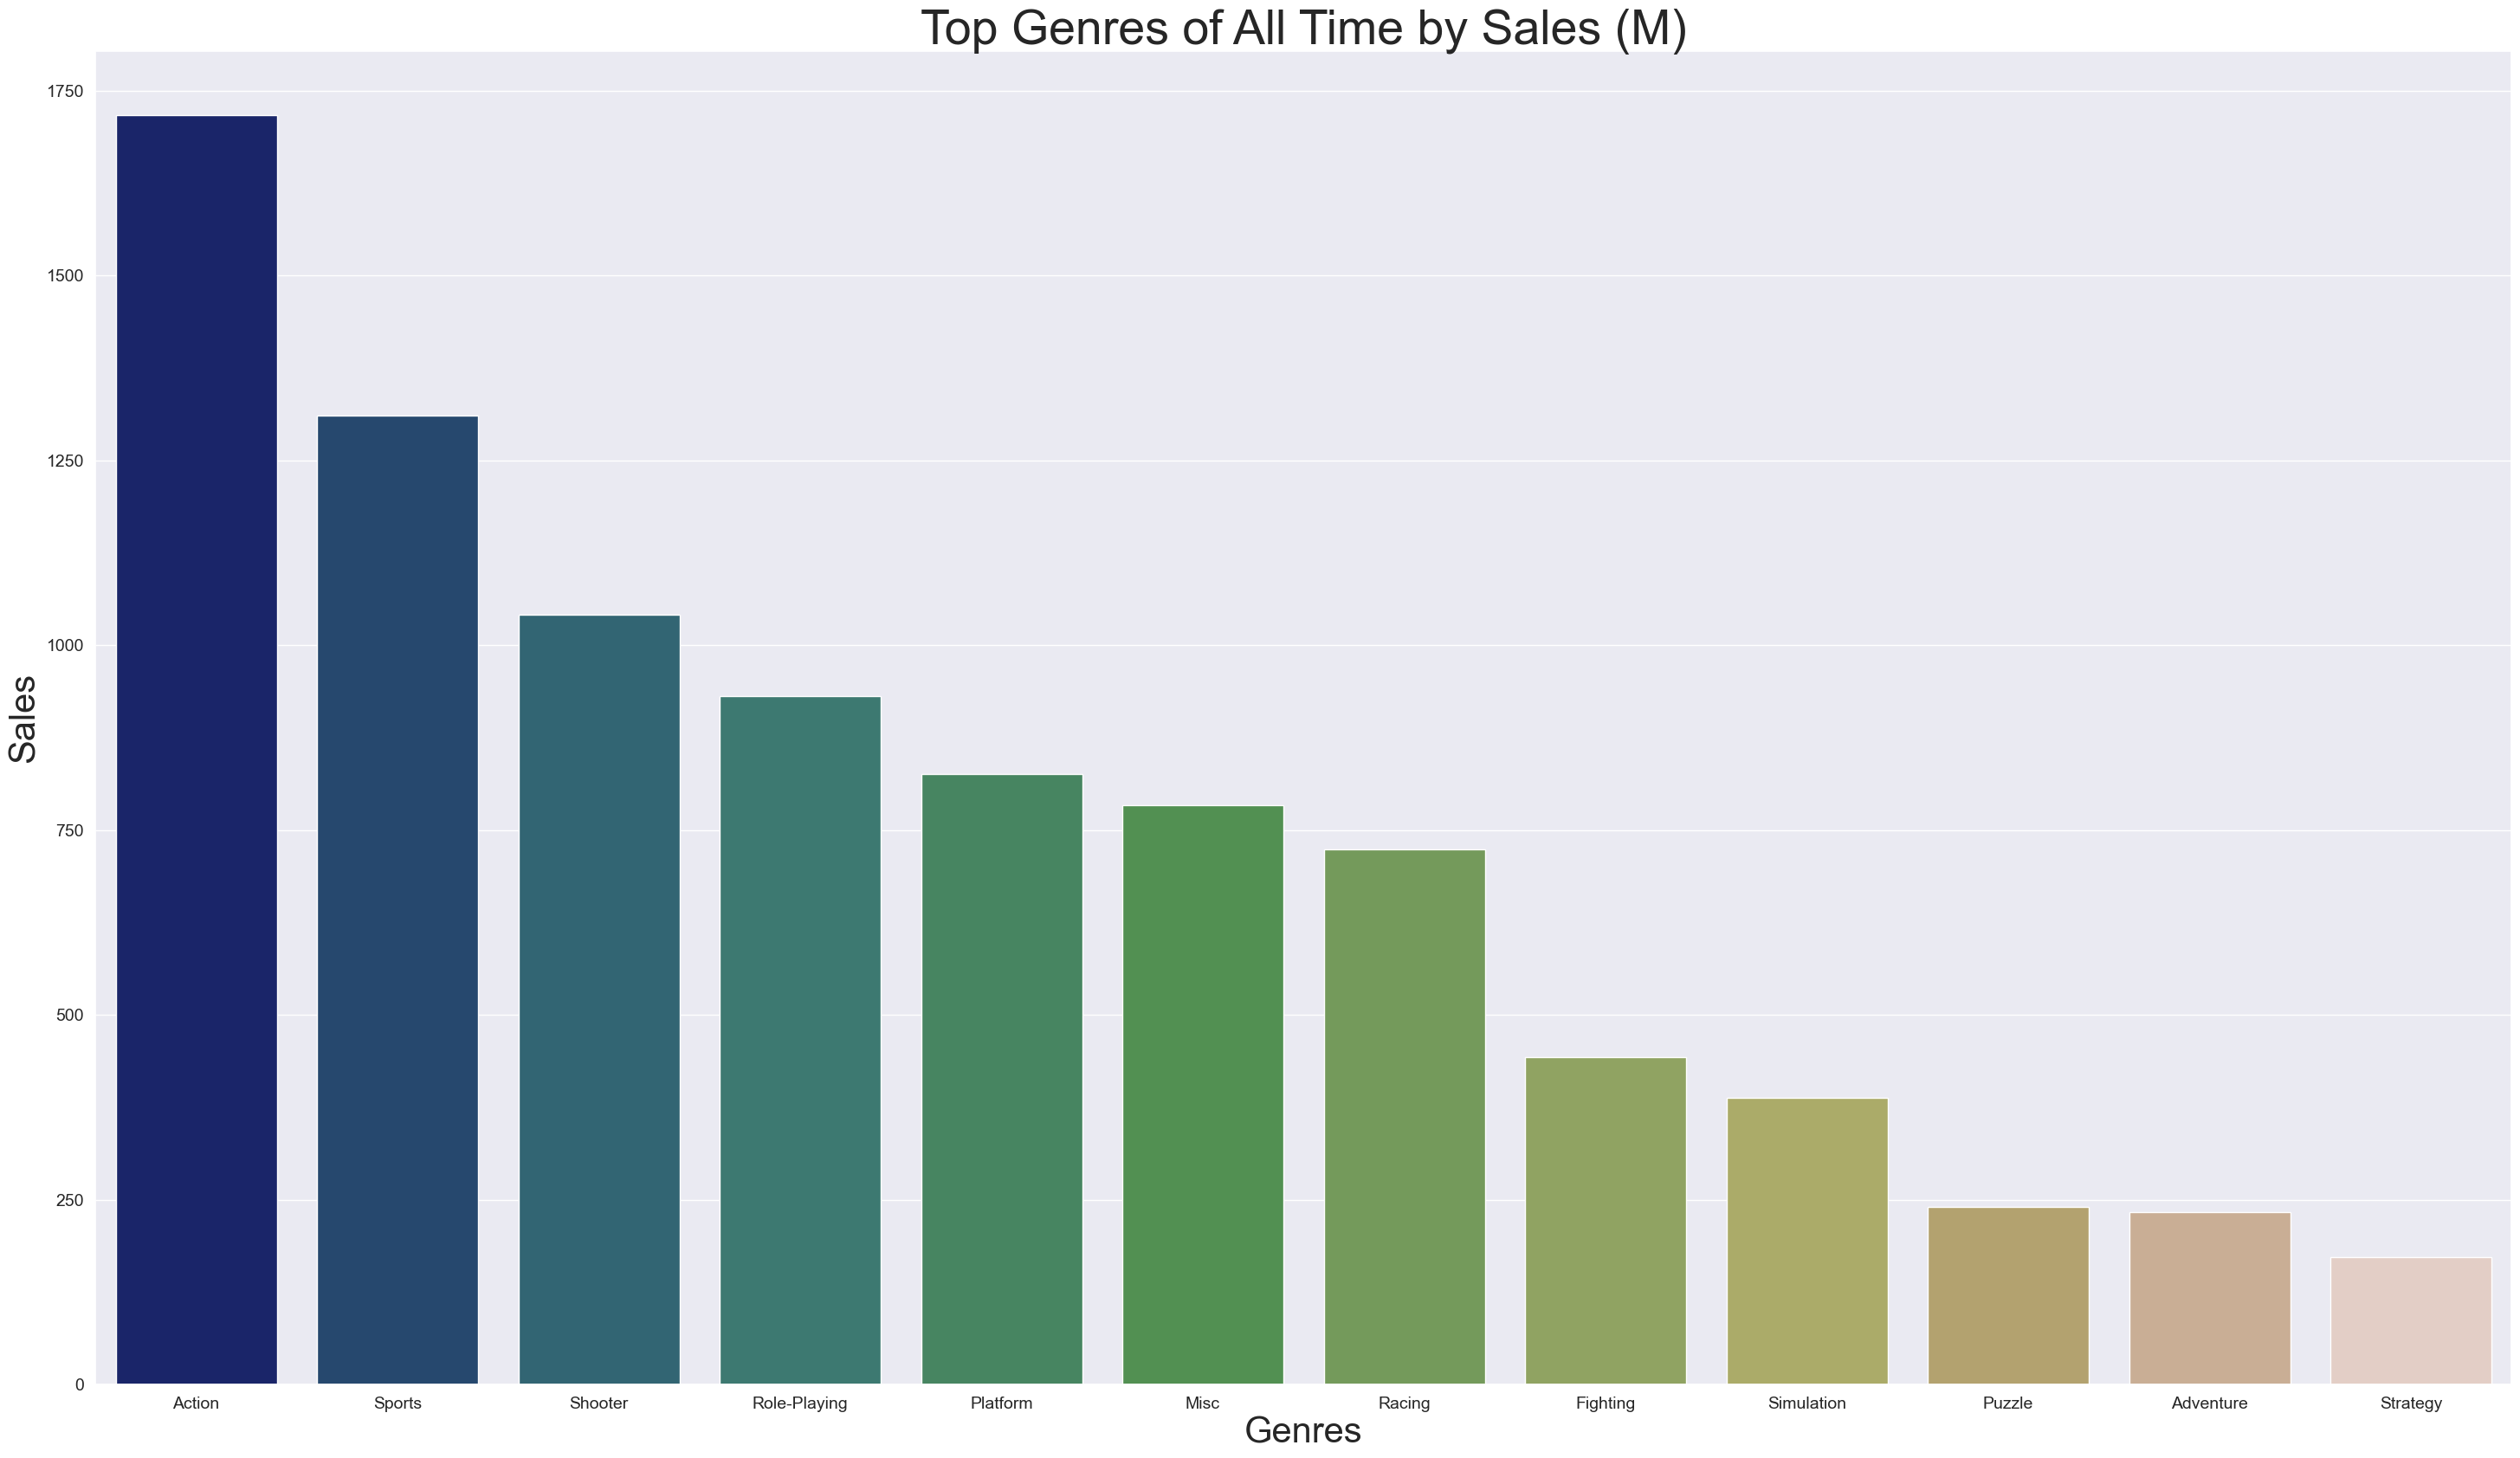

In [782]:
# plotting top genres 

# define Seaborn color palette to use
palette_color = sns.color_palette('gist_earth', n_colors = 1)[0]

# plot values in a Seaborn barplot 
sns.barplot(x = bestselling_genres.index, y = bestselling_genres.values, hue = bestselling_genres.index, palette = "gist_earth", legend = False, estimator = np.sum)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Genres', fontsize = 30)
plt.ylabel('Sales',fontsize = 30)
plt.title('Top Genres of All Time by Sales (M)', fontsize = 40) 

# Genre Insights  
* Action games are by far the most successful Genre of all time - games like GTA, Halo, and Fortnite continue to take the market by storm
* Sports games closely follow - most likely driven by Nintendo's influence with releases like Wii Sports
* By both volume and sales puzzle and strategy struggle and maintain a very low market share
* Surprisingly, while Adventure has alot of game releases, it doesn't do well in terms of sales

<div style="background-color: beige; text-align: center; font-weight: bold; padding: 10px; font-size: 24px;">
    Market Analysis & Insights
</div>

# Q1: What are the top 10 best selling games of all time? Who developed them? What trends do we see?

In [577]:
# group top 10 global sales by game and developer 
best_games = df.groupby(['Name', 'Developer'])['Global_Sales'].sum().sort_values(ascending = False).reset_index().head(10)
best_games

,Name,Developer,Global_Sales
0,Wii Sports,Nintendo,82.53
1,Grand Theft Auto V,Rockstar North,56.57
2,Mario Kart Wii,Nintendo,35.52
3,Wii Sports Resort,Nintendo,32.77
4,New Super Mario Bros.,Nintendo,29.80
5,Call of Duty: Modern Warfare 3,"Infinity Ward, Sledgehammer Games",29.77
6,Call of Duty: Black Ops II,Treyarch,29.40
7,Wii Play,Nintendo,28.92
8,Call of Duty: Black Ops,Treyarch,28.61
9,New Super Mario Bros. Wii,Nintendo,28.32


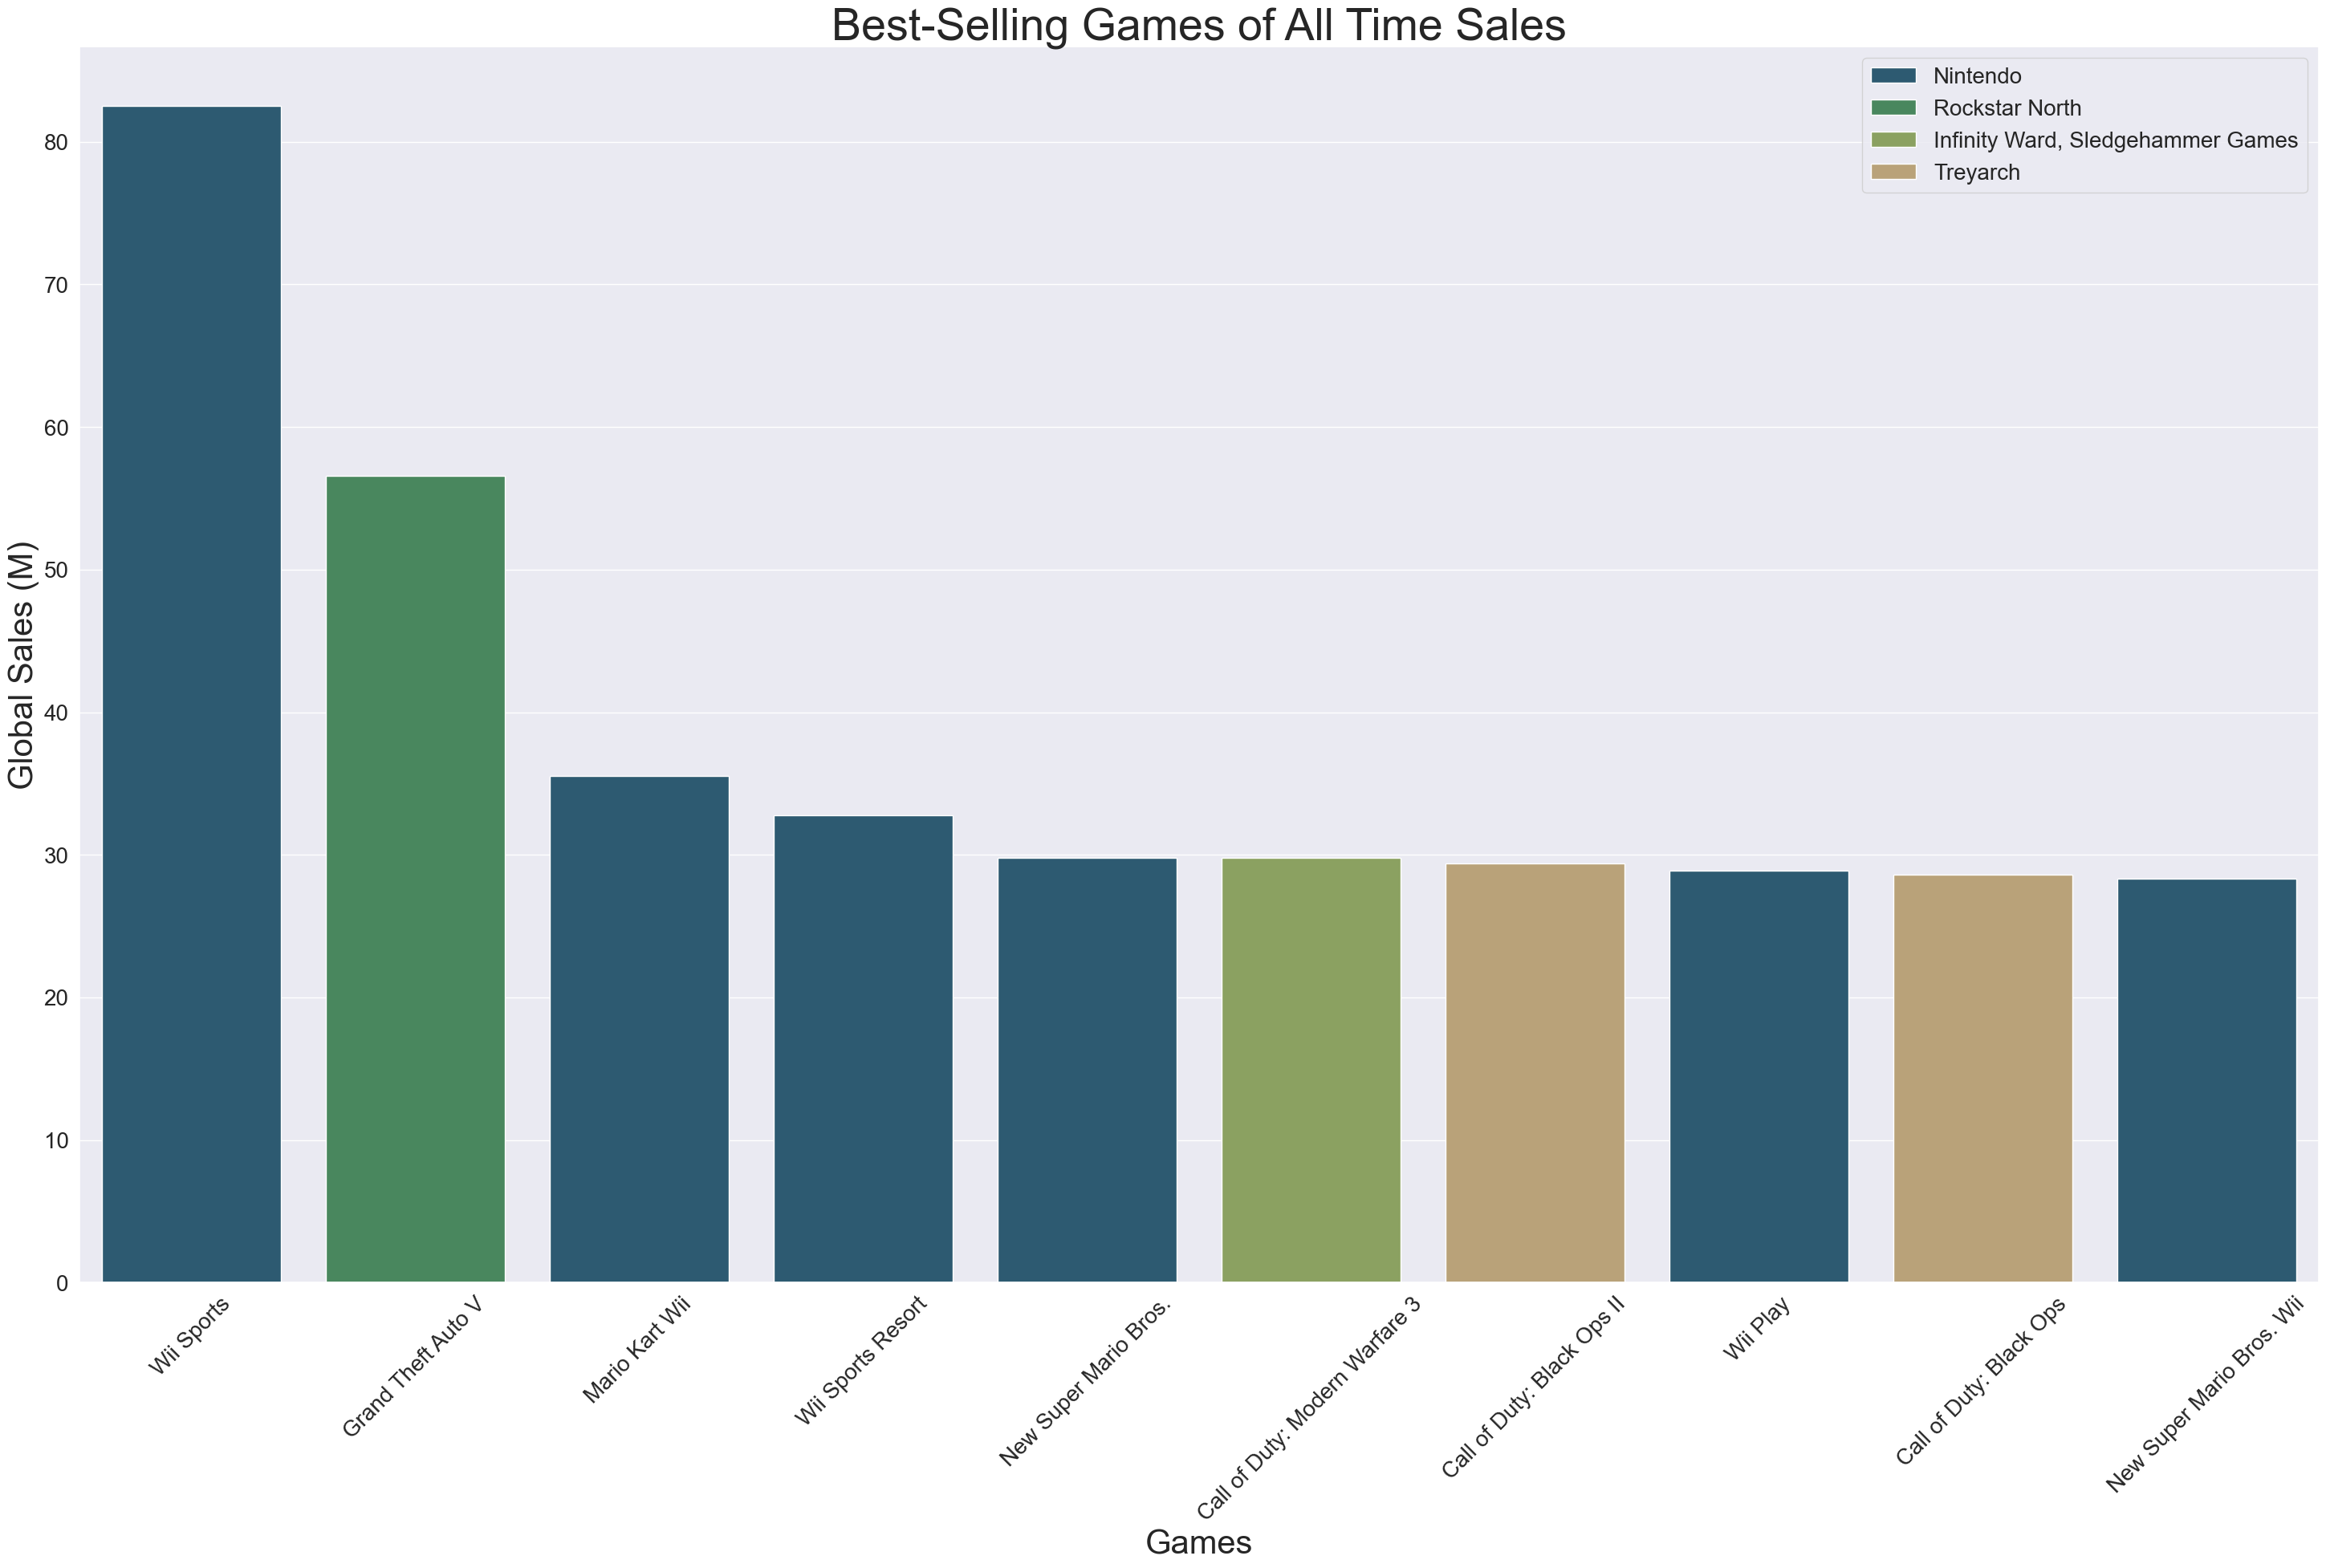

In [645]:
# define the x and y variables
x = best_games['Name']
y = best_games['Global_Sales']

# plot grouped table in a seaborn bar plot 
sns.barplot(data = best_games, x = 'Name', y = 'Global_Sales', hue = 'Developer', palette = 'gist_earth')

# format the table 
plt.xticks(fontsize = 20, rotation = 45)
plt.yticks(fontsize = 20)
plt.xlabel('Games', fontsize = 30)
plt.ylabel('Global Sales (M)', fontsize = 30)
plt.title('Best-Selling Games of All Time Sales', fontsize = 40)
plt.legend(fontsize = 20)
plt.show()

# Q1 Insights
* Nintendo has developed the most successful games of all time - consistent with our Developer deev dive analysos
* Wii Sports is the top selling game with Grand Theft Auto V (My personal favorite) following closely behind
* This analysis demonstrates that investor shuld target Nintendo-like sports games and action games to drive sales

# Q2: Which game was the most and least well-received by critics during the gaming boom?

In [641]:
# sort gaming boom by descending critic scores   
highest_score = gaming_boom.sort_values(by = 'Critic_Score', ascending = False).head(10)
highest_score

,Name,Platform,Platforms_Clean,Developer,Rating,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
57,Grand Theft Auto IV,PS3,PlayStation 3,Rockstar North,M,2008,Action,Take-Two Interactive,4.76,3.69,0.44,1.61,10.50,98.0,64.0,7.5,2833.00
51,Grand Theft Auto IV,X360,Xbox 360,Rockstar North,M,2008,Action,Take-Two Interactive,6.76,3.07,0.14,1.03,11.01,98.0,86.0,7.9,2951.00
97,Super Mario Galaxy 2,Wii,Nintendo Wii,Nintendo EAD Tokyo,E,2010,Platform,Nintendo,3.56,2.35,0.98,0.62,7.51,97.0,87.0,9.1,1854.00
49,Super Mario Galaxy,Wii,Nintendo Wii,Nintendo,E,2007,Platform,Nintendo,6.06,3.35,1.20,0.74,11.35,97.0,73.0,8.9,2147.00
121,Uncharted 2: Among Thieves,PS3,PlayStation 3,Naughty Dog,T,2009,Action,Sony Computer Entertainment,3.27,2.20,0.21,0.98,6.66,96.0,105.0,8.8,5187.00
4710,BioShock,PC,Personal Computer,"Irrational Games, 2K Marin",M,2007,Shooter,Take-Two Interactive,0.01,0.39,0.00,0.02,0.41,96.0,44.0,8.5,3606.00
964,The Orange Box,X360,Xbox 360,Valve Software,M,2007,Shooter,Electronic Arts,1.09,0.53,0.02,0.17,1.82,96.0,54.0,8.9,797.00
516,BioShock,X360,Xbox 360,"Irrational Games, 2K Marin",M,2007,Shooter,Take-Two Interactive,1.65,0.85,0.05,0.28,2.83,96.0,88.0,8.9,2249.00
9143,The Orange Box,PC,Personal Computer,Valve Software,M,2007,Shooter,Electronic Arts,0.00,0.11,0.00,0.03,0.14,96.0,34.0,9.3,1495.00
450,Mass Effect 2,X360,Xbox 360,BioWare,M,2010,Role-Playing,Electronic Arts,1.99,0.81,0.03,0.27,3.10,96.0,98.0,8.9,3143.00


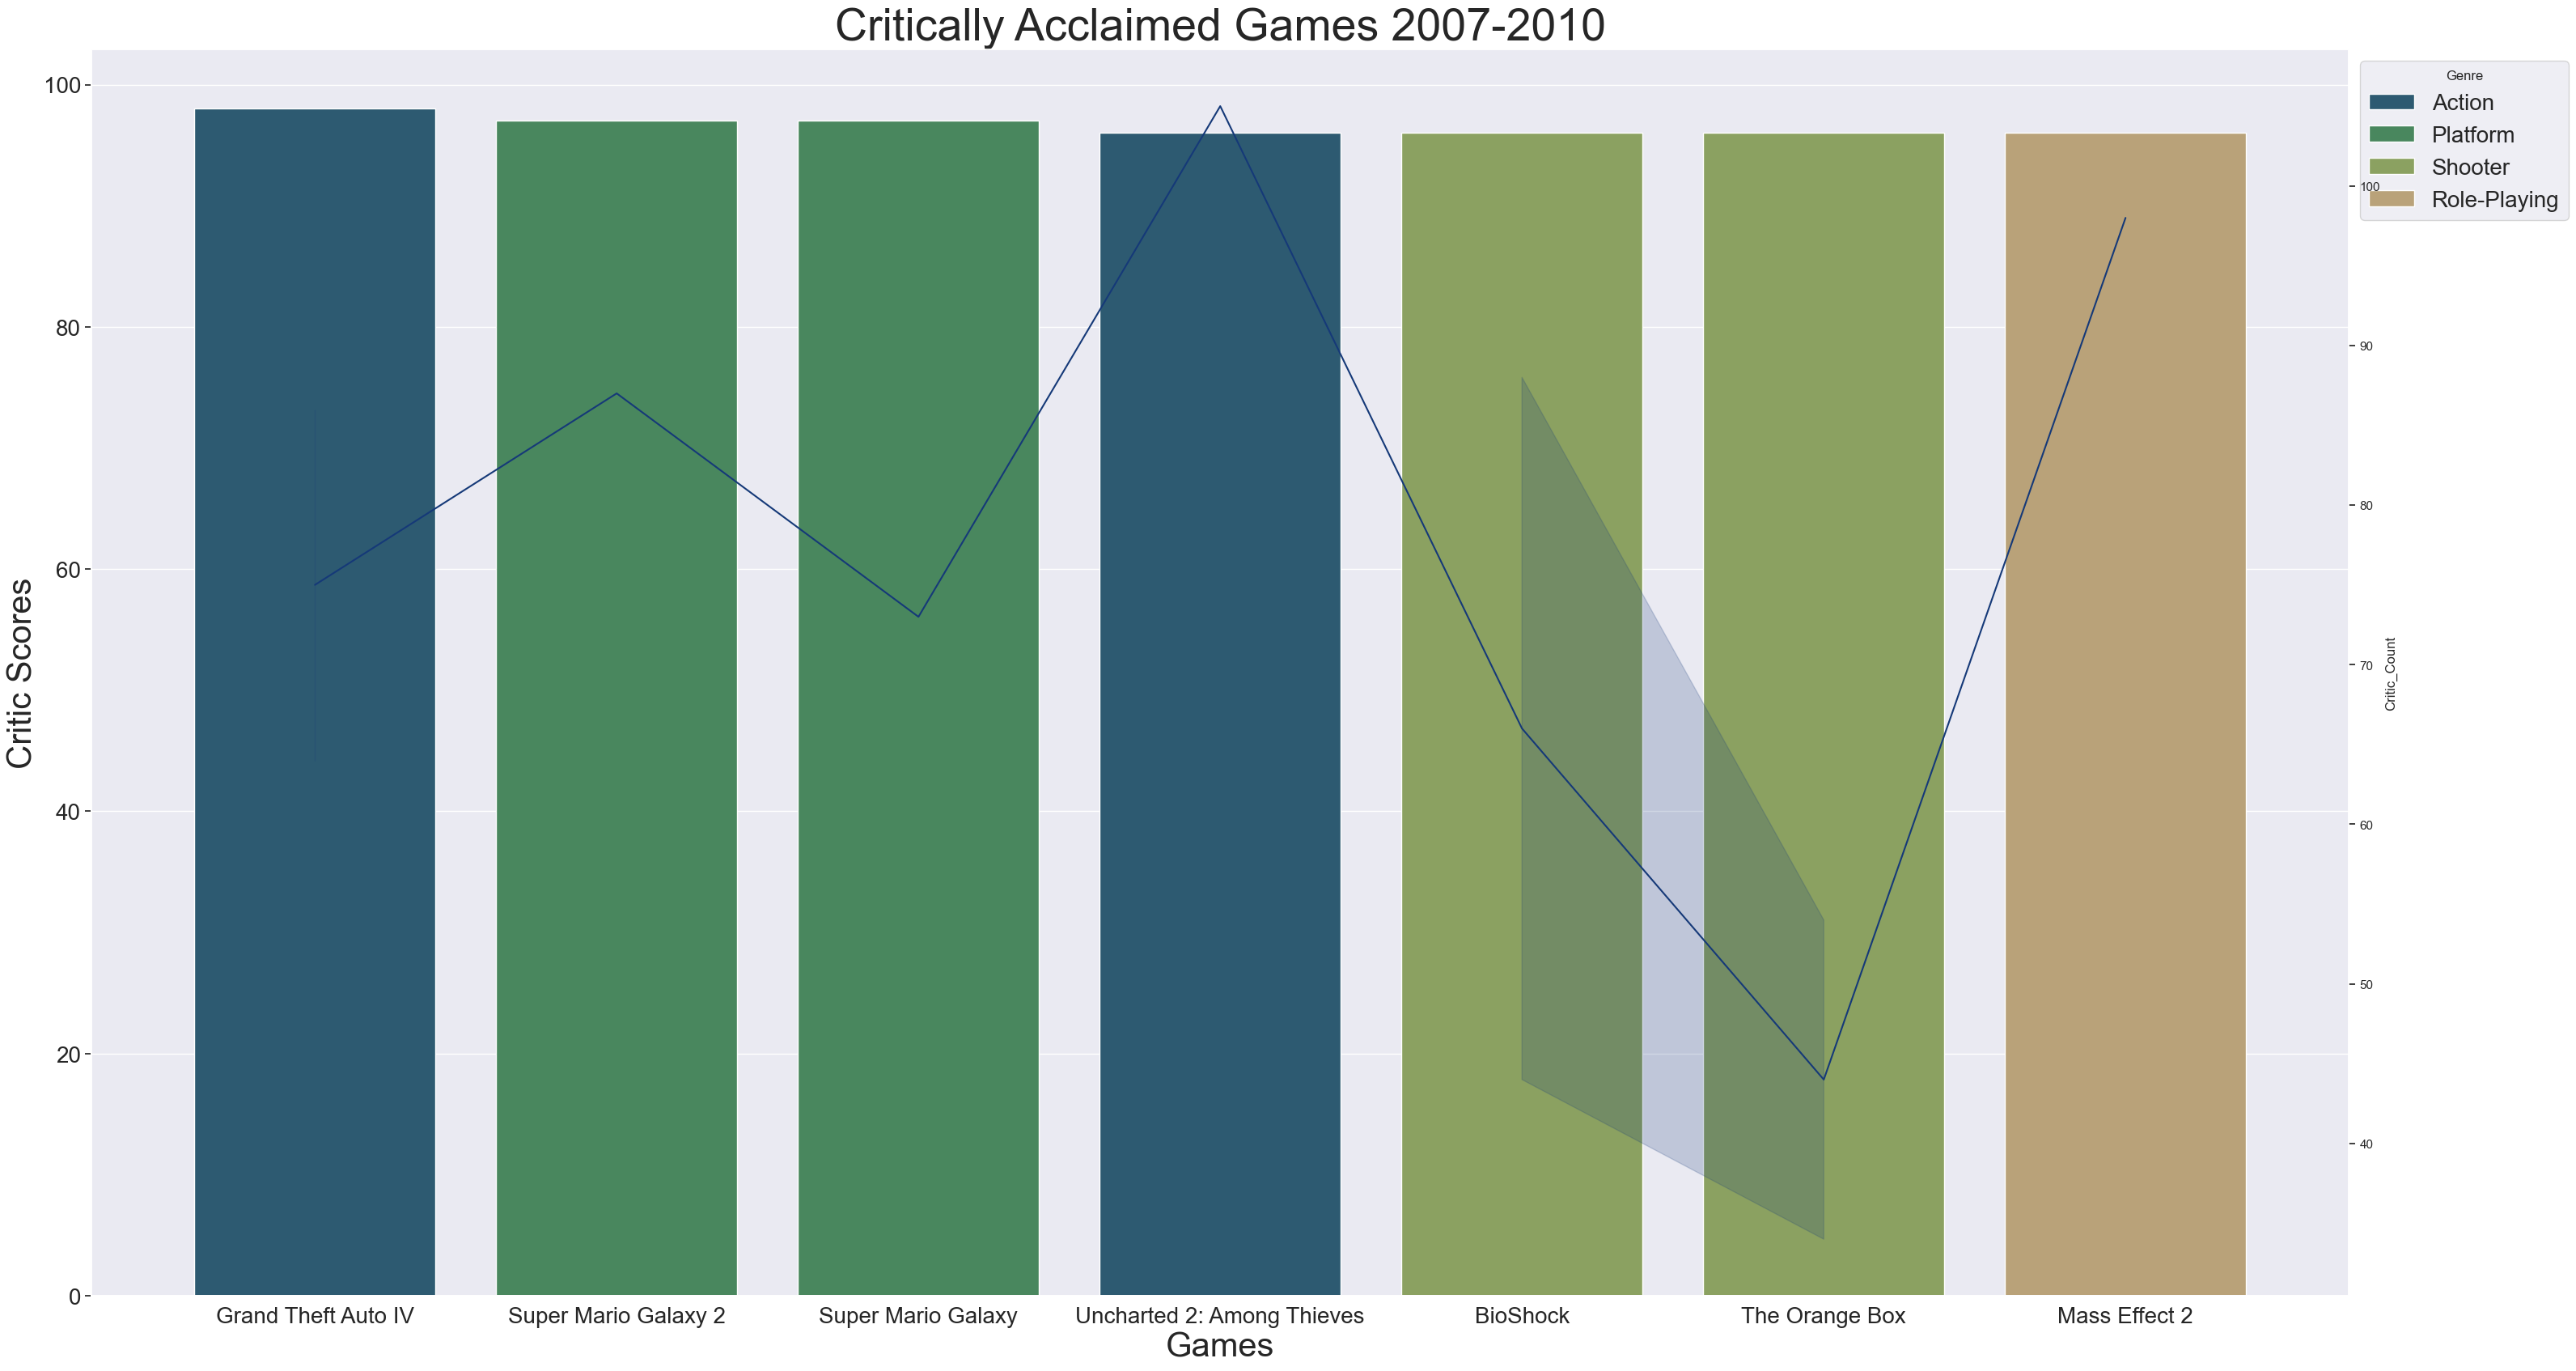

In [796]:
# create the figure and the first axis
fig, ax1 = plt.subplots()

# assign variables to x, y1, and y2
x = highest_score['Name']
y1 = highest_score['Critic_Score']
y2 = highest_score['Critic_Count']

# plot a bar graph for Critic Scores
bar = sns.barplot(data=highest_score, x='Name', y='Critic_Score', ax=ax1, hue='Genre', palette='gist_earth')  
ax1.set_xlabel('Games', fontsize = 30)
ax1.set_ylabel('Critic Scores', fontsize = 30)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

# create the second y axis
ax2 = ax1.twinx()

# Disable gridlines on the second axis (so they don't overlap the bars)
ax2.grid(False)

# define Seaborn color palette to use
palette = sns.color_palette('gist_earth', n_colors=7)

# plot a line graph for Critic Count using ax2
sns.lineplot(data=highest_score, x='Name', y='Critic_Count', ax=ax2, color=palette[0]) 

# formatting the figure 
ax1.set_title('Critically Acclaimed Games 2007-2010', fontsize = 40) 

# adjust legend
ax1.legend(title="Genre", loc='upper left', bbox_to_anchor=(1, 1), fontsize = 20)

# Remove markers if there are unwanted ones
for line in ax2.lines:
    line.set_marker('')

# display the plot
plt.show()

In [633]:
# sort gaming boom by descending critic scores   
lowest_score = gaming_boom.sort_values(by = 'Critic_Score', ascending = True).head(10)
lowest_score

,Name,Platform,Platforms_Clean,Developer,Rating,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
10663,Leisure Suit Larry: Box Office Bust,PS3,PlayStation 3,Team 17,M,2009,Adventure,Codemasters,0.06,0.03,0.0,0.01,0.10,17.0,11.0,1.7,37.00
12132,Anubis II,Wii,Nintendo Wii,Data Design Interactive,E,2007,Platform,Metro 3D,0.06,0.00,0.0,0.00,0.07,19.0,5.0,2.7,28.00
15345,Balls of Fury,Wii,Nintendo Wii,Black Lantern Studios,E10+,2007,Sports,Zoo Digital Publishing,0.02,0.00,0.0,0.00,0.02,19.0,6.0,2.8,25.00
9106,Chicken Shoot,DS,Nintendo DS,FrontLine Studios,E10+,2007,Action,Zoo Digital Publishing,0.13,0.00,0.0,0.01,0.14,19.0,4.0,3.1,7.00
1050,Deal or No Deal,DS,Nintendo DS,Artefacts Studio,E,2007,Misc,Mindscape,1.15,0.40,0.0,0.15,1.70,20.0,13.0,1.9,41.00
11443,Ninjabread Man,Wii,Nintendo Wii,Data Design Interactive,E,2007,Action,Popcorn Arcade,0.07,0.00,0.0,0.01,0.08,20.0,6.0,1.7,52.00
11968,Homie Rollerz,DS,Nintendo DS,Webfoot Technologies,E,2008,Racing,Destineer,0.07,0.00,0.0,0.01,0.07,23.0,9.0,2.4,12.00
622,Game Party,Wii,Nintendo Wii,Midway,E,2007,Misc,Midway Games,1.47,0.77,0.0,0.24,2.48,25.0,8.0,4.3,26.00
8483,Leisure Suit Larry: Box Office Bust,X360,Xbox 360,Team 17,M,2009,Adventure,Codemasters,0.14,0.01,0.0,0.01,0.16,25.0,27.0,2.5,41.00
7346,Hannah Montana: The Movie,X360,Xbox 360,n-Space,E,2009,Adventure,Disney Interactive Studios,0.14,0.05,0.0,0.02,0.21,25.0,4.0,3.8,48.00


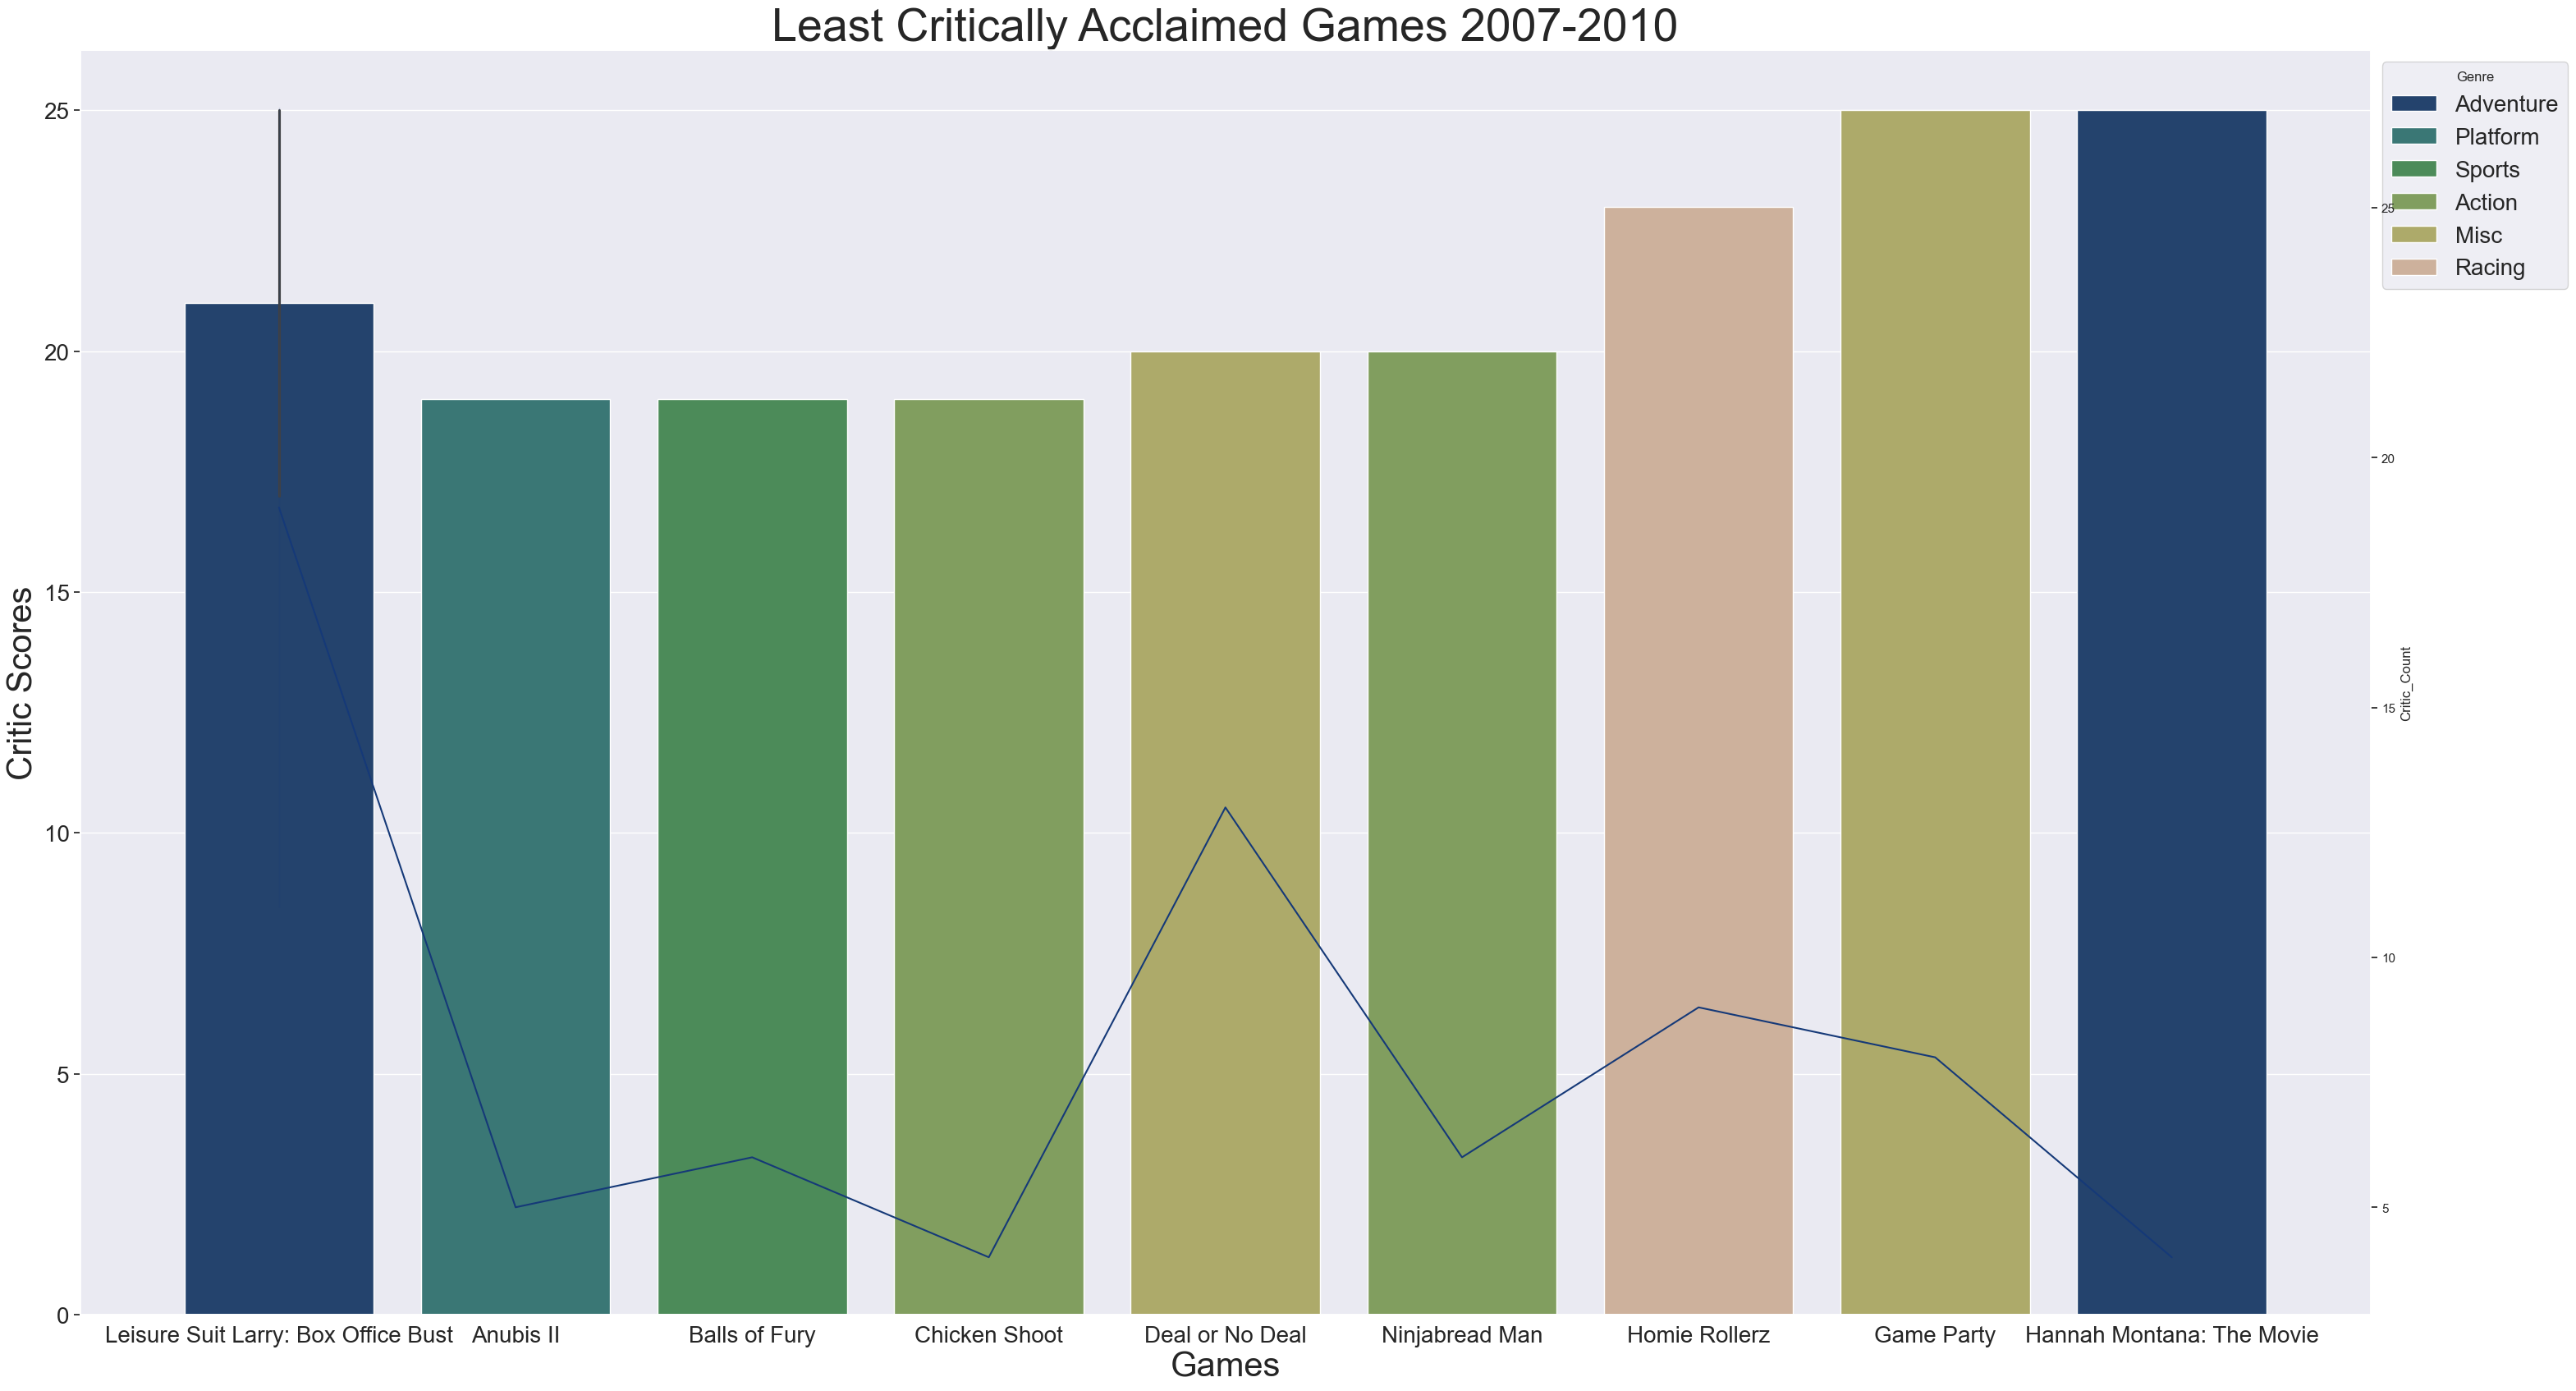

In [651]:
# create the figure and the first axis
fig, ax1 = plt.subplots()

# assign variables to x, y1, and y2
x = lowest_score['Name']
y1 = lowest_score['Critic_Score']
y2 = lowest_score['Critic_Count']

# plot a bar graph for Critic Scores
bar = sns.barplot(data = lowest_score, x='Name', y='Critic_Score', ax=ax1, hue='Genre', palette='gist_earth')  
ax1.set_xlabel('Games', fontsize = 30)
ax1.set_ylabel('Critic Scores', fontsize = 30)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

# create the second y axis
ax2 = ax1.twinx()

# Disable gridlines on the second axis (so they don't overlap the bars)
ax2.grid(False)

# define Seaborn color palette to use
palette = sns.color_palette('gist_earth', n_colors=7)

# plot a line graph for Critic Count using ax2
sns.lineplot(data = lowest_score, x='Name', y='Critic_Count', ax=ax2, color=palette[0]) 

# formatting the figure 
ax1.set_title('Least Critically Acclaimed Games 2007-2010', fontsize = 40) 

# adjust legend
ax1.legend(title="Genre", loc='upper left', bbox_to_anchor=(1, 1), fontsize = 20)

# Remove markers if there are unwanted ones
for line in ax2.lines:
    line.set_marker('')

# display the plot
plt.show()

# Q2 Insights 
* Grand Theft Auto IV is a best-selling and the most critically acclaimed game of all time with a score of 98 Playstation 3 and XBOX 360 - as a use of this game myself the UI design, travel capabilities, and diverse missions made this a showstopper amongst my siblings and I 
* Leisure Suit Larry: Box Office Bust on Play Station 3 is the least critically acclaimed game with a score of 17
* Uncharted 2 had a significantly higher amount of critics compared to GTA4 and left with a score of 96 - I may want to try this one day
* In terms of genre mix, they were similar between the best and worst scoring games. However, Racing games were more frequent as least popular amongst critics.

# Q3: Which gaming platform saw the highest global sales during the gaming boom, and how does it compare to others?

In [221]:
# top genres in the gaming boom

# grouping sales by genre 
boom_genres = gaming_boom.groupby('Genre')['Global_Sales'].sum().sort_values(ascending = False).head(8)
boom_genres

Genre
Action          493.13
Sports          421.08
Misc            348.57
Shooter         276.06
Role-Playing    219.34
Racing          176.91
Simulation      149.09
Platform        141.80
Name: Global_Sales, dtype: float64

In [690]:
# summing all global sales across all genres
gamingboom_sales = boom_genres.sum()

Text(0.5, 1.0, 'Top Genres by Sales 2007-2010')

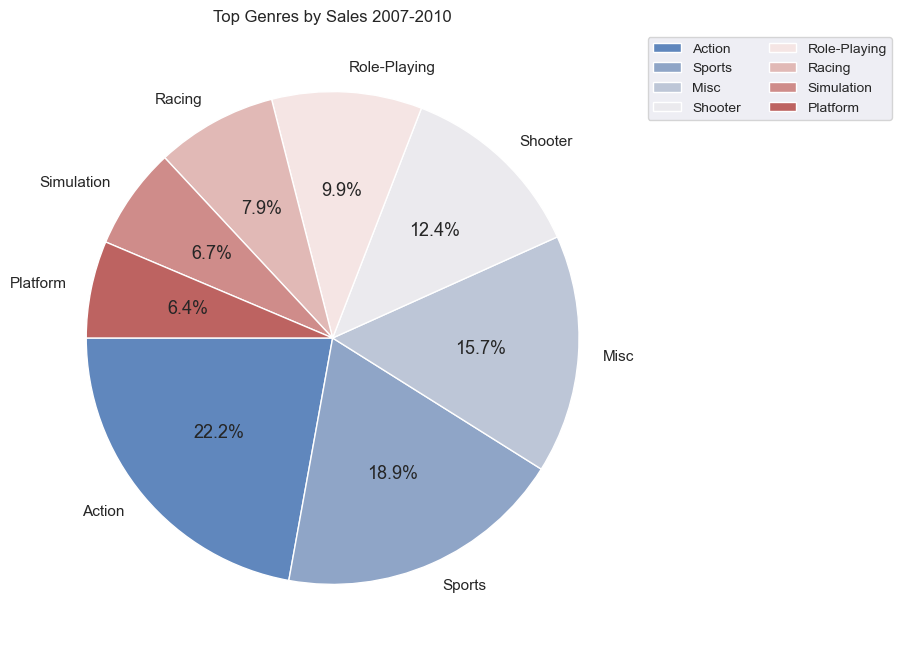

In [659]:
# plotting genres from 2007-2010 by sales

plt.figure(figsize=(20,8))
palette = sns.color_palette('vlag', len(boom_genres))
plt.pie(boom_genres, labels = boom_genres.index, colors = palette, autopct='%1.1f%%', startangle=180)
plt.legend(loc=2, fontsize=10, bbox_to_anchor=(1,1),ncol=2)
plt.title('Top Genres by Sales 2007-2010')

In [686]:
# calculating market share of action and sports genres during the gaming boom
Action = 22.2
Sports = 18.9
best_genres = Action + Sports
best_genres

41.099999999999994

In [692]:
# calculating Action + Sports in Sales 
gamingboom_sales * 0.41 

912.6518

## Q3 Insights  
* Of ~2B sales in the gaming boom (2007-2010), Action games make of 22% of the market followed by sports games at 19%
* Together they make up almost half the market at 41% or 912M in sales
* Investors should consider prioritizing investments in Action and Sports games, as these genres have proven to be dominant and lucrative
* Consumer interest in these genres remains strong, suggesting sustained demand and a solid foundation for future gaming titles or platforms targeting these audiences

<div style="background-color: beige; text-align: center; font-weight: bold; padding: 10px; font-size: 24px;">
    Summary & Conclusion
</div>

### Overview + Data Preparation  
* The dataset is sourced from Kaggle, detailing 16,416 global video games and their sales data from 1980 to 2020.  
* It includes key variables such as Game Name, Developer, Platform, Genre, Global Sales, Critic Score, and User Score.  
* Data cleaning and preparation steps:  
  * Removed rows with null values.  
  * Standardized platform names for consistency (e.g., consolidating "PS" to "PlayStation" and "X360" to "Xbox 360").  
  * Adjusted columns to correct data types (e.g., converting sales to floats and years to integers).  

### Data Analysis  
* Exploratory analysis and visualization spanned the entire dataset (1980–2020), revealing 8.8B in total sales.  
  * Focused on the “gaming boom” (2007–2010), where global sales spiked to ~2B units.  
* Deep dives were conducted across multiple areas:  
  * **Developer**:  
    * Nintendo emerged as the most successful game developer during the gaming boom, holding over 37% of the global market.  
  * **Platforms**:  
    * PlayStation 2, Xbox 360, and PlayStation 3 were identified as the highest-selling platforms of all time.  
    * Mobile gaming accounted for ~30% of the market during its rise in the gaming boom.  
  * **Genre**:  
    * Action games led as the most successful genre of all time, achieving over 1.7B in sales.  
      * Iconic titles like *GTA*, *Halo*, and *Fortnite* continue to dominate the market.  
    * Sports games closely followed, likely driven by Nintendo's influence with releases like *Wii Sports*.  
* Market-level analysis highlighted key insights:  
  * *Wii Sports* is the best-selling game of all time (82M units).  
  * *GTA V* is the most critically acclaimed game with a Critic Score of 98.  
  * Investors should prioritize Action and Sports games, which have consistently proven to be dominant and lucrative.  

### Future Enhancements   
* Regional analysis could uncover geographic strengths and weaknesses for each game or genre.  
* Enriching the dataset with developer countries of origin could provide additional market insights.  
* Natural Language Processing (NLP) could expand the analysis by generating personalized game recommendations based on user preferences. 